In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import datasets
import geopandas as gpd
import nltk

In [75]:
# Đọc tệp CSV với low_memory=False
df = pd.read_csv("D:\\players_22.csv", encoding="UTF-8", low_memory=False)

# Hoặc bạn có thể chỉ định kiểu dữ liệu cho các cột cụ thể
dtype_spec = {
    'column_name_25': 'str',
    'column_name_108': 'str',
}


In [76]:
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


In [77]:
# Tạo bảng tóm tắt thông tin DataFrame
summary = {
    'rows': df.shape[0],
    'columns': df.shape[1],
    'discrete_columns': df.select_dtypes(include=['object', 'category']).shape[1],
    'continuous_columns': df.select_dtypes(include=['number']).shape[1],
    'all_missing_columns': df.columns[df.isnull().all()].size,
    'total_missing_values': df.isnull().sum().sum(),
    'complete_rows': df.dropna().shape[0],
    'total_observations': df.size,
    'memory_usage': df.memory_usage(deep=True).sum()
}

# In kết quả
for key, value in summary.items():
    print(f'{key}: {value}')


rows: 19239
columns: 110
discrete_columns: 50
continuous_columns: 60
all_missing_columns: 0
total_missing_values: 152618
complete_rows: 0
total_observations: 2116290
memory_usage: 64122891


In [78]:
# Hiển thị thông tin chung về DataFrame 
print("Thông tin chung về DataFrame:") 
print(df.info()) 
# Hiển thị thống kê mô tả 
print("\nThống kê mô tả:") 
print(df.describe()) 
# Hiển thị những dòng đầu tiên của DataFrame 
print("\nNhững dòng đầu tiên của DataFrame:") 
print(df.head())

Thông tin chung về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None

Thống kê mô tả:
           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     h

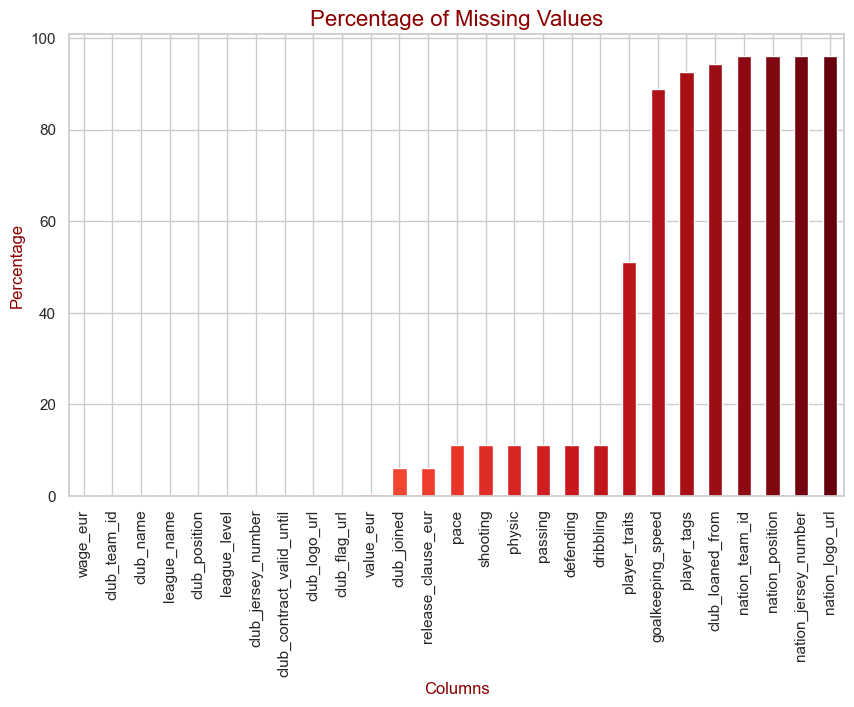

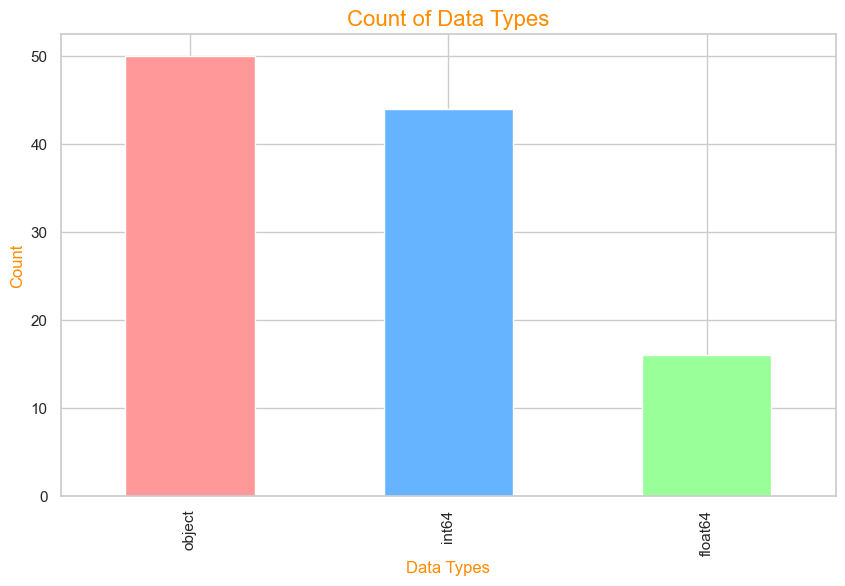

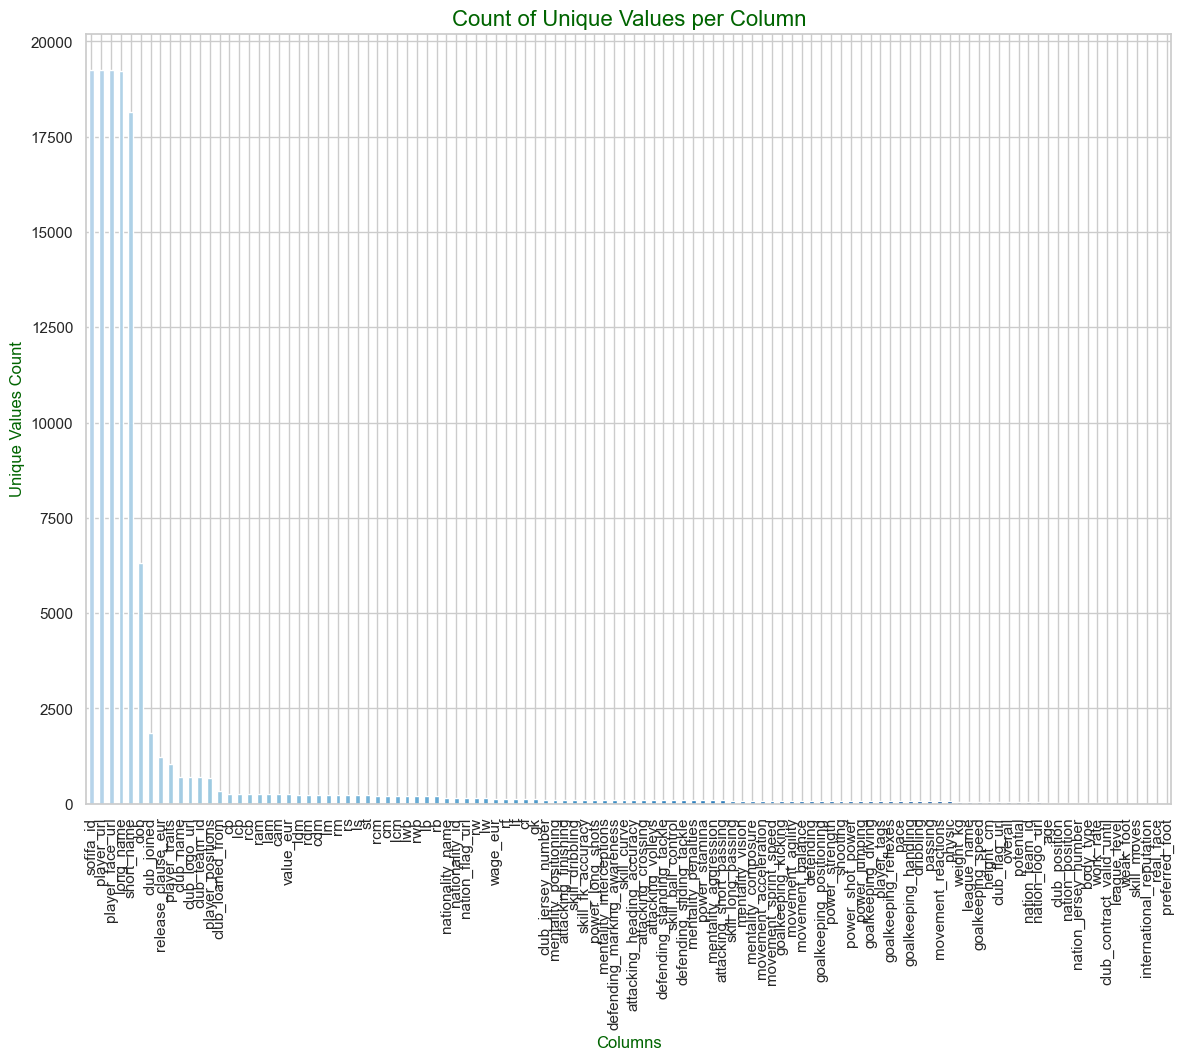

In [79]:
# Biểu đồ tỉ lệ giá trị thiếu
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()
plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(missing)))
missing.plot(kind='bar', color=colors)
plt.title('Percentage of Missing Values', fontsize=16, color='darkred')
plt.xlabel('Columns', fontsize=12, color='darkred')
plt.ylabel('Percentage', fontsize=12, color='darkred')
plt.show()

# Biểu đồ số lượng mỗi kiểu dữ liệu
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'pink', 'yellow']
df.dtypes.value_counts().plot(kind='bar', color=colors)
plt.title('Count of Data Types', fontsize=16, color='darkorange')
plt.xlabel('Data Types', fontsize=12, color='darkorange')
plt.ylabel('Count', fontsize=12, color='darkorange')
plt.show()

# Biểu đồ số lượng các giá trị duy nhất trong mỗi cột
plt.figure(figsize=(14, 10))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(df.nunique())))
df.nunique().sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Count of Unique Values per Column', fontsize=16, color='darkgreen')
plt.xlabel('Columns', fontsize=12, color='darkgreen')
plt.ylabel('Unique Values Count', fontsize=12, color='darkgreen')
plt.show()


In [80]:
bundesliga = [
  "1. FC Nürnberg", "1. FSV Mainz 05", "Bayer 04 Leverkusen", "FC Bayern München",
  "Borussia Dortmund", "Borussia Mönchengladbach", "Eintracht Frankfurt",
  "FC Augsburg", "FC Schalke 04", "Fortuna Düsseldorf", "Hannover 96",
  "Hertha BSC", "RB Leipzig", "SC Freiburg", "TSG 1899 Hoffenheim",
  "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"
]

premierLeague = [
  "Arsenal", "Bournemouth", "Brighton & Hove Albion", "Burnley",
  "Cardiff City", "Chelsea", "Crystal Palace", "Everton", "Fulham",
  "Huddersfield Town", "Leicester City", "Liverpool", "Manchester City",
  "Manchester United", "Newcastle United", "Southampton", 
  "Tottenham Hotspur", "Watford", "West Ham United", "Wolverhampton Wanderers"
]

laliga = [
  "Athletic Club de Bilbao", "Atlético Madrid", "CD Leganés",
  "Deportivo Alavés", "FC Barcelona", "Getafe CF", "Girona FC", 
  "Levante UD", "Rayo Vallecano", "RC Celta", "RCD Espanyol", 
  "Real Betis", "Real Madrid", "Real Sociedad", "Real Valladolid CF",
  "SD Eibar", "SD Huesca", "Sevilla FC", "Valencia CF", "Villarreal CF"
]

seriea = [
  "Atalanta","Bologna","Cagliari","Chievo Verona","Empoli", "Fiorentina","Frosinone","Genoa",
  "Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma","Sampdoria","Sassuolo","SPAL",
  "Torino","Udinese"
]

superlig = [
  "Akhisar Belediyespor","Alanyaspor", "Antalyaspor","Medipol Başakşehir FK","BB Erzurumspor","Beşiktaş JK",
  "Bursaspor","Çaykur Rizespor","Fenerbahçe SK", "Galatasaray SK","Göztepe SK","Kasimpaşa SK",
  "Kayserispor","Atiker Konyaspor","MKE Ankaragücü", "Sivasspor","Trabzonspor","Yeni Malatyaspor"
]

ligue1 = [
  "Amiens SC", "Angers SCO", "AS Monaco", "AS Saint-Étienne", "Dijon FCO", "En Avant de Guingamp",
  "FC Nantes", "FC Girondins de Bordeaux", "LOSC Lille", "Montpellier HSC", "Nîmes Olympique", 
  "OGC Nice", "Olympique Lyonnais","Olympique de Marseille", "Paris Saint-Germain", 
  "RC Strasbourg Alsace", "Stade Malherbe Caen", "Stade de Reims", "Stade Rennais FC", "Toulouse Football Club"
]

eredivisie = [
  "ADO Den Haag","Ajax", "AZ Alkmaar", "De Graafschap","Excelsior","FC Emmen","FC Groningen",
  "FC Utrecht", "Feyenoord","Fortuna Sittard", "Heracles Almelo","NAC Breda",
  "PEC Zwolle", "PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"
]

liganos = [
  "Os Belenenses", "Boavista FC", "CD Feirense", "CD Tondela", "CD Aves", "FC Porto",
  "CD Nacional", "GD Chaves", "Clube Sport Marítimo", "Moreirense FC", "Portimonense SC", "Rio Ave FC",
  "Santa Clara", "SC Braga", "SL Benfica", "Sporting CP", "Vitória Guimarães", "Vitória de Setúbal"
]

# Categorize clubs into leagues and countries using 'club_name'
df['League'] = df['club_name'].apply(lambda club: 'Bundesliga' if club in bundesliga else
                                              'Premier League' if club in premierLeague else
                                              'La Liga' if club in laliga else
                                              'Serie A' if club in seriea else
                                              'Süper Lig' if club in superlig else
                                              'Ligue 1' if club in ligue1 else
                                              'Liga Nos' if club in liganos else
                                              'Eredivisie' if club in eredivisie else None)

df['Country'] = df['League'].apply(lambda league: 'Germany' if league == 'Bundesliga' else
                                                'UK' if league == 'Premier League' else
                                                'Spain' if league == 'La Liga' else
                                                'Italy' if league == 'Serie A' else
                                                'Turkey' if league == 'Süper Lig' else
                                                'France' if league == 'Ligue 1' else
                                                'Portugal' if league == 'Liga Nos' else
                                                'Netherlands' if league == 'Eredivisie' else None)

# Filter out rows where 'League' is None
df = df.dropna(subset=['League'])

# Display the first few rows of the DataFrame
print(df.head())


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   rcb    rb    gk  \
0       93         93   78000000.0  320000.0   34  .

In [81]:
# Tạo từ điển mapping cho các league và country
league_country_mapping = {
    'Bundesliga': ('Germany', bundesliga),
    'Premier League': ('UK', premierLeague),
    'La Liga': ('Spain', laliga),
    'Serie A': ('Italy', seriea),
    'Süper Lig': ('Turkey', superlig),
    'Ligue 1': ('France', ligue1),
    'Liga Nos': ('Portugal', liganos),
    'Eredivisie': ('Netherlands', eredivisie)
}

# Hàm để tìm league và country dựa trên tên club
def get_league_and_country(club_name):
    for league, (country, clubs) in league_country_mapping.items():
        if club_name in clubs:
            return league, country
    return None, None

# Áp dụng hàm để tạo các cột 'League' và 'Country'
df['League'], df['Country'] = zip(*df['club_name'].apply(get_league_and_country))

# Lọc ra các dòng có giá trị 'League' là None
df = df.dropna(subset=['League'])

# Hiển thị vài dòng đầu tiên của DataFrame
print(df.head())


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   rcb    rb    gk  \
0       93         93   78000000.0  320000.0   34  .

In [82]:
print(df[['long_name','value_eur', 'wage_eur']].head())

                             long_name    value_eur  wage_eur
0       Lionel Andrés Messi Cuccittini   78000000.0  320000.0
1                   Robert Lewandowski  119500000.0  270000.0
2  Cristiano Ronaldo dos Santos Aveiro   45000000.0  270000.0
3        Neymar da Silva Santos Júnior  129000000.0  270000.0
4                      Kevin De Bruyne  125500000.0  350000.0


In [83]:
# Kiểm tra các kiểu dữ liệu của các cột liên quan
print(df[['value_eur', 'wage_eur']].dtypes)

# Chuyển đổi cột 'value_eur' và 'wage_eur' thành chuỗi nếu cần thiết
df['value_eur'] = df['value_eur'].astype(str)
df['wage_eur'] = df['wage_eur'].astype(str)

# Xử lý cột 'Value' và 'Wage'
df['Values'] = df['value_eur'].str.replace('€', '').str.replace('K', '000').str.replace('M', '').astype(float)
df['Wages'] = df['wage_eur'].str.replace('€', '').str.replace('K', '000').astype(float)

# Chuyển đổi giá trị 'Values' từ triệu sang đơn vị euro
df['Values'] = df['Values'].apply(lambda x: x * 1000000 if x < 1000 else x)

# Hiển thị những dòng đầu tiên của DataFrame để kiểm tra
print(df[['value_eur', 'Values', 'wage_eur', 'Wages']].head())


value_eur    float64
wage_eur     float64
dtype: object
     value_eur       Values  wage_eur     Wages
0   78000000.0   78000000.0  320000.0  320000.0
1  119500000.0  119500000.0  270000.0  270000.0
2   45000000.0   45000000.0  270000.0  270000.0
3  129000000.0  129000000.0  270000.0  270000.0
4  125500000.0  125500000.0  350000.0  350000.0


In [84]:
print(df['club_position'].unique())

['RW' 'ST' 'LW' 'RCM' 'GK' 'LCB' 'RDM' 'SUB' 'CAM' 'RS' 'LCM' 'RCB' 'LDM'
 'LB' 'RB' 'LM' 'CDM' 'CB' 'CF' 'RM' 'LS' 'RES' 'RWB' 'RF' 'CM' 'LWB'
 'LAM' 'LF' 'RAM']


In [85]:
defence = ["CB", "RB", "LB", "LWB", "RWB", "LCB", "RCB"]
midfielder = ["CM", "CDM","CAM","LM","RM", "LAM", "RAM", "LCM", "RCM", "LDM", "RDM"]

# Phân loại cầu thủ
df['Class'] = df['club_position'].apply(lambda x: 'Goal Keeper' if x == "GK" else
                                                  'Defender' if x in defence else
                                                  'Midfielder' if x in midfielder else
                                                  'Forward')

# Hiển thị những dòng đầu tiên của DataFrame để kiểm tra
print(df[['club_position', 'Class']].head(15))


   club_position        Class
0             RW      Forward
1             ST      Forward
2             ST      Forward
3             LW      Forward
4            RCM   Midfielder
6             ST      Forward
7             GK  Goal Keeper
8             GK  Goal Keeper
9             ST      Forward
10           RCM   Midfielder
13            LW      Forward
15           LCB     Defender
16            LW      Forward
17            RW      Forward
18            GK  Goal Keeper


In [86]:
# Lọc các giá trị "Left" và "Right"
df = df[df['preferred_foot'].isin(["Left", "Right"])]

# Chuyển đổi cột 'Preferred.Foot' thành kiểu category
df['Preferred.Foot'] = df['preferred_foot'].astype('category')

# Hiển thị DataFrame để kiểm tra kết quả
print(df[['Preferred.Foot']].head())
print(df.dtypes)  # Kiểm tra kiểu dữ liệu của cột 'Preferred.Foot'


  Preferred.Foot
0           Left
1          Right
2          Right
3          Right
4          Right
sofifa_id              int64
player_url            object
short_name            object
long_name             object
player_positions      object
                      ...   
Country               object
Values               float64
Wages                float64
Class                 object
Preferred.Foot      category
Length: 116, dtype: object


In [87]:
# Loại bỏ các cột không cần thiết
df = df.drop(columns=[
    "sofifa_id", "body_type", "real_face", "club_joined", "club_loaned_from",
    "release_clause_eur", "player_face_url", "club_flag_url", "club_logo_url", "nation_flag_url", 
    "work_rate"
])

# Hiển thị những dòng đầu tiên của DataFrame để kiểm tra kết quả
print(df.head())


                                          player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/188545/robert-lewand...     R. Lewandowski   
2  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
3  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
4  https://sofifa.com/player/192985/kevin-de-bruy...       K. De Bruyne   

                             long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini       RW, ST, CF       93         93   
1                   Robert Lewandowski               ST       92         92   
2  Cristiano Ronaldo dos Santos Aveiro           ST, LW       91         91   
3        Neymar da Silva Santos Júnior          LW, CAM       91         91   
4                      Kevin De Bruyne          CM, CAM       91         91   

     value_eur  wage_eur  age         dob  ...   rcb    rb    gk  \
0   78

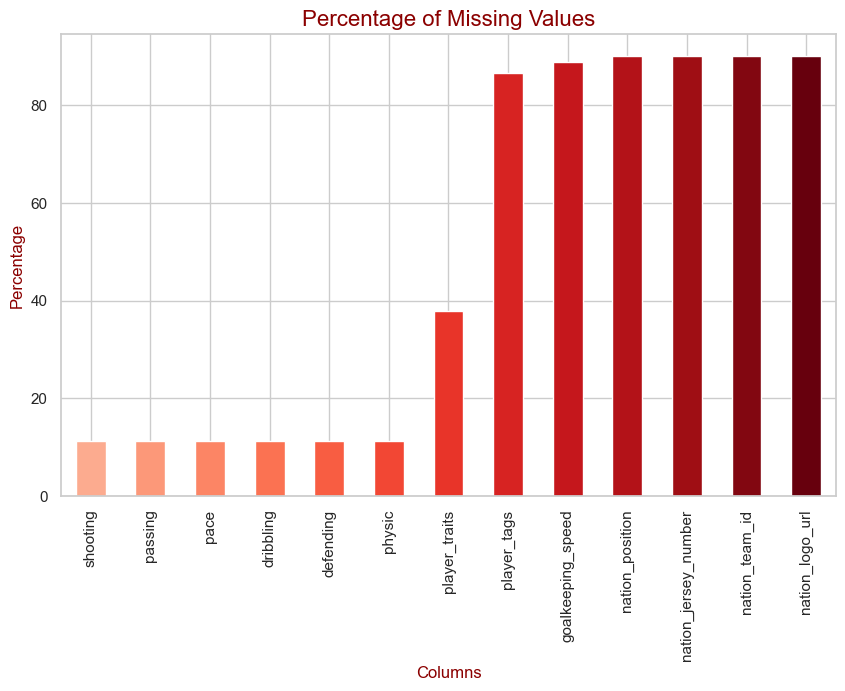

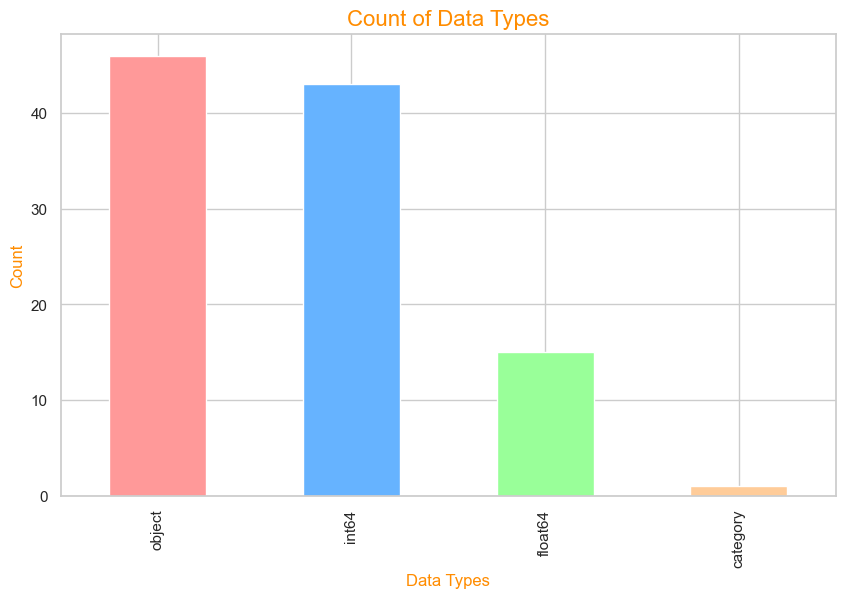

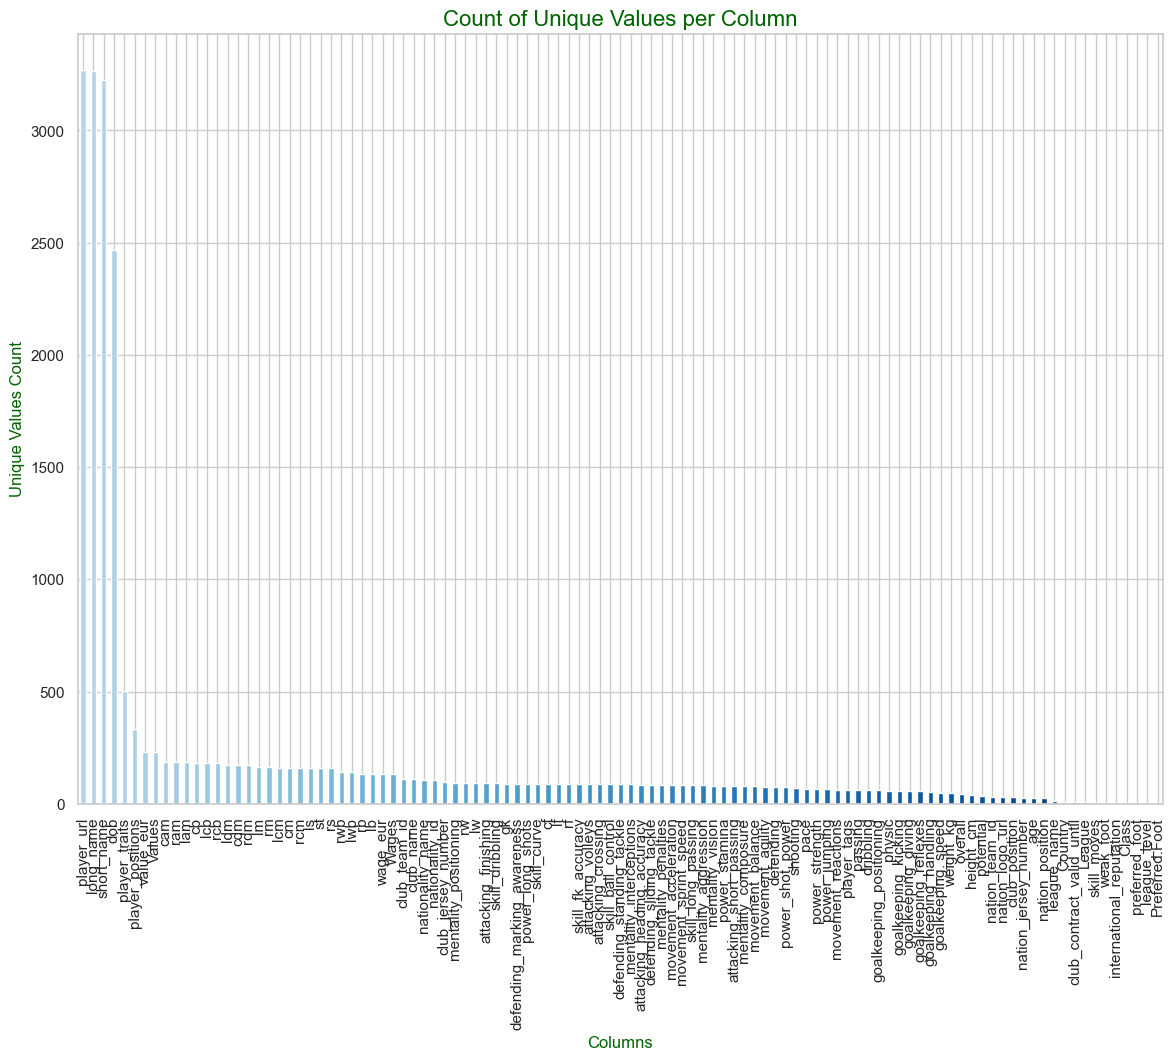

In [88]:
# Biểu đồ tỉ lệ giá trị thiếu
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()
plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(missing)))
missing.plot(kind='bar', color=colors)
plt.title('Percentage of Missing Values', fontsize=16, color='darkred')
plt.xlabel('Columns', fontsize=12, color='darkred')
plt.ylabel('Percentage', fontsize=12, color='darkred')
plt.show()

# Biểu đồ số lượng mỗi kiểu dữ liệu
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'pink', 'yellow']
df.dtypes.value_counts().plot(kind='bar', color=colors)
plt.title('Count of Data Types', fontsize=16, color='darkorange')
plt.xlabel('Data Types', fontsize=12, color='darkorange')
plt.ylabel('Count', fontsize=12, color='darkorange')
plt.show()

# Biểu đồ số lượng các giá trị duy nhất trong mỗi cột
plt.figure(figsize=(14, 10))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(df.nunique())))
df.nunique().sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Count of Unique Values per Column', fontsize=16, color='darkgreen')
plt.xlabel('Columns', fontsize=12, color='darkgreen')
plt.ylabel('Unique Values Count', fontsize=12, color='darkgreen')
plt.show()


<Figure size 1500x1000 with 0 Axes>

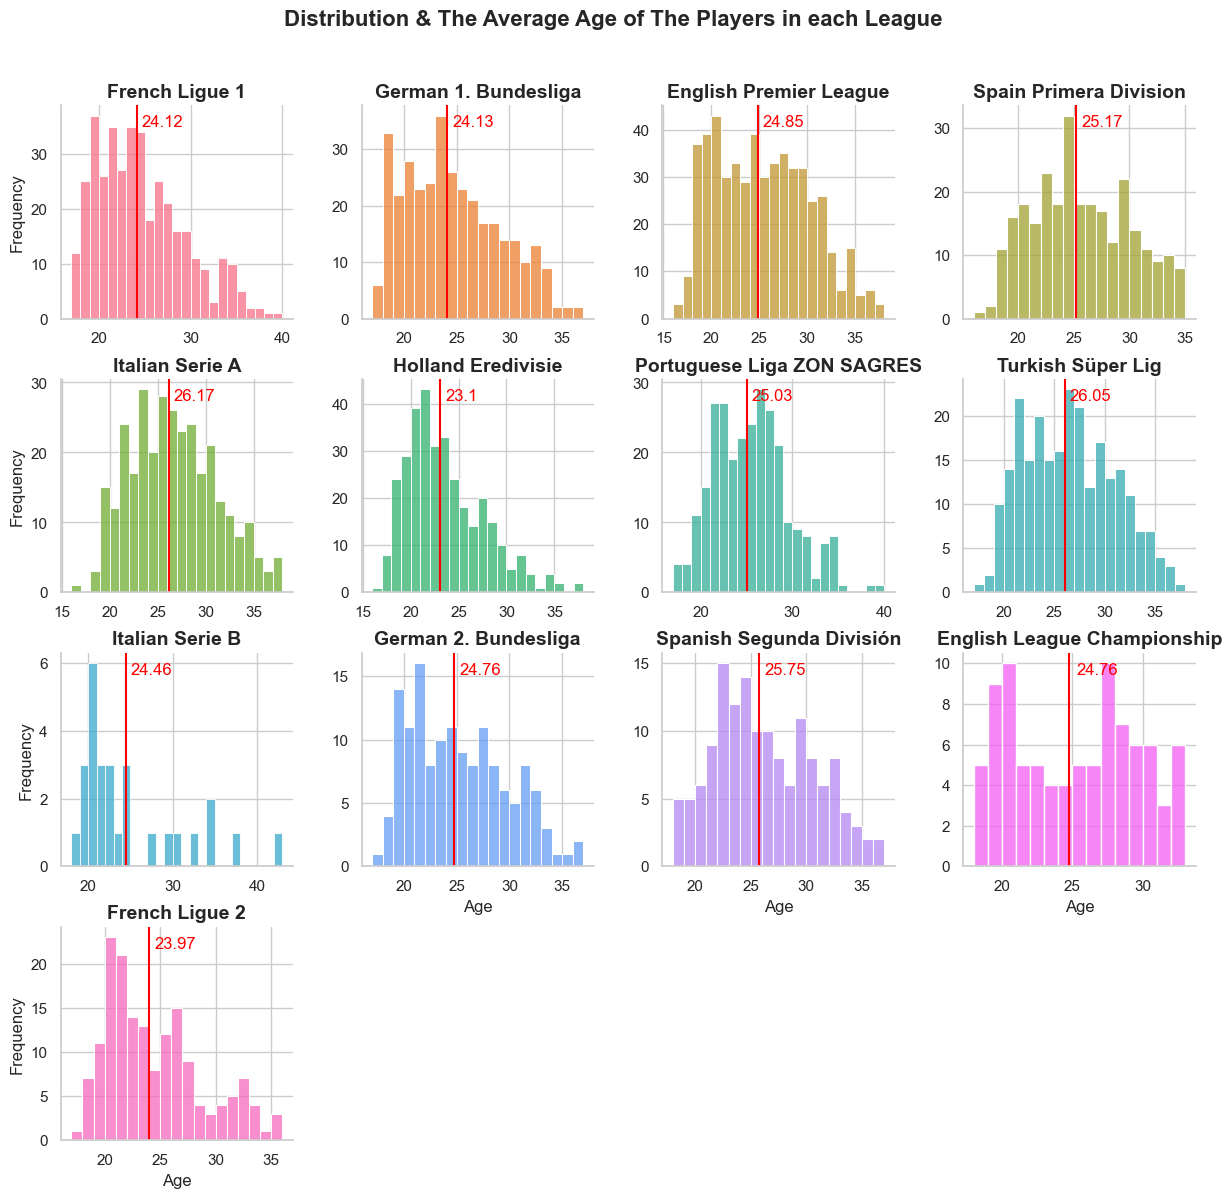

In [89]:
# Tính toán tuổi trung bình theo League
summ = df.groupby('league_name').agg({'age': 'mean'}).reset_index()

# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Tạo bảng màu cho các giải đấu
leagues = df['league_name'].unique()
palette = sns.color_palette("husl", len(leagues))
colors = dict(zip(leagues, palette))

# Tạo các histogram và vẽ đường tuổi trung bình cho từng giải đấu
g = sns.FacetGrid(df, col="league_name", col_wrap=4, sharex=False, sharey=False, palette=palette)

# Vẽ biểu đồ với màu riêng biệt cho từng giải đấu
for ax, league_name, color in zip(g.axes.flatten(), leagues, palette):
    subset = df[df['league_name'] == league_name]
    sns.histplot(subset, x='age', ax=ax, binwidth=1, color=color)
    # Vẽ đường tuổi trung bình
    mean_age = summ[summ['league_name'] == league_name]['age'].values[0]
    ax.axvline(mean_age, color='red', linewidth=1.5)
    ax.text(mean_age + 0.5, ax.get_ylim()[1] * 0.9, round(mean_age, 2), color='red')
    # Làm đậm tên của các biểu đồ
    ax.set_title(league_name, fontsize=14, weight='bold')

# Thiết lập các thông số cho biểu đồ
g.set_axis_labels("Age", "Frequency")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution & The Average Age of The Players in each League', fontsize=16, weight='bold')
plt.show()


In [90]:
df.head()

,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,rcb,rb,gk,nation_logo_url,League,Country,Values,Wages,Class,Preferred.Foot
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,50+3,61+3,19+3,https://cdn.sofifa.net/teams/1369/60.png,Ligue 1,France,78000000.0,320000.0,Forward,Left
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,60+3,61+3,19+3,https://cdn.sofifa.net/teams/1353/60.png,Bundesliga,Germany,119500000.0,270000.0,Forward,Right
2,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,53+3,60+3,20+3,https://cdn.sofifa.net/teams/1354/60.png,Premier League,UK,45000000.0,270000.0,Forward,Right
3,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,50+3,62+3,20+3,NaN,Ligue 1,France,129000000.0,270000.0,Forward,Right
4,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,69+3,75+3,21+3,https://cdn.sofifa.net/teams/1325/60.png,Premier League,UK,125500000.0,350000.0,Midfielder,Right


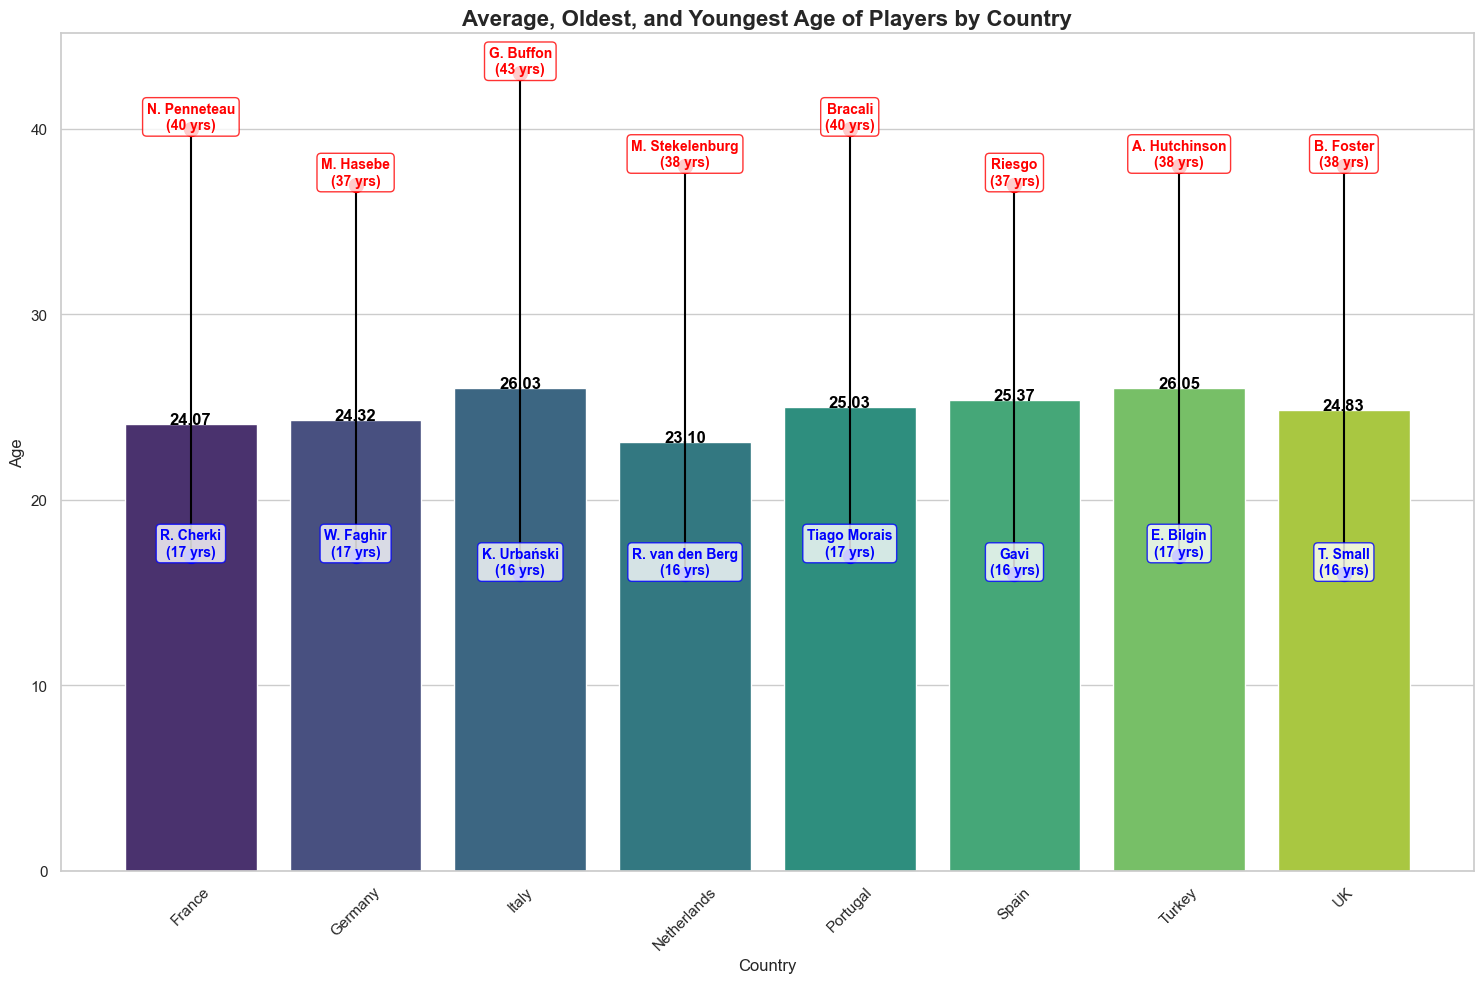

In [91]:
# Tính toán các số liệu thống kê
age_stats = df.groupby('Country')['age'].agg(['mean', 'min', 'max']).reset_index()

# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Vẽ biểu đồ với các màu sắc khác nhau cho từng quốc gia
barplot = sns.barplot(x='Country', y='mean', hue='Country', data=age_stats, palette='viridis', legend=False)

# Thêm các đường biểu diễn độ tuổi nhỏ nhất và già nhất
for index, row in age_stats.iterrows():
    plt.plot([index, index], [row['min'], row['max']], color='black', linewidth=1.5)
    plt.plot(index, row['min'], 'o', color='blue', markersize=10)
    plt.plot(index, row['max'], 'o', color='red', markersize=10)
    # Thêm số liệu trung bình cụ thể trên mỗi cột
    plt.text(index, row['mean'], f'{row["mean"]:.2f}', color='black', ha='center', fontsize=12, weight='bold')

# Thêm các cầu thủ đặc trưng
oldest_youngest_players = []
for index, country in enumerate(age_stats['Country']):
    subset = df[df['Country'] == country]
    oldest_player = subset.loc[subset['age'].idxmax()]
    youngest_player = subset.loc[subset['age'].idxmin()]
    oldest_youngest_players.append((index, oldest_player['age'], oldest_player['short_name'], 'red'))
    oldest_youngest_players.append((index, youngest_player['age'], youngest_player['short_name'], 'blue'))

# Vẽ các hộp chú thích cho các cầu thủ đặc trưng
for index, age, name, color in oldest_youngest_players:
    player_info = f'{name}\n({age} yrs)'
    plt.text(index, age, player_info, color=color, ha='center', fontsize=10, weight='bold', 
             bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3', alpha=0.8))

# Thiết lập các thông số cho biểu đồ
plt.title('Average, Oldest, and Youngest Age of Players by Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


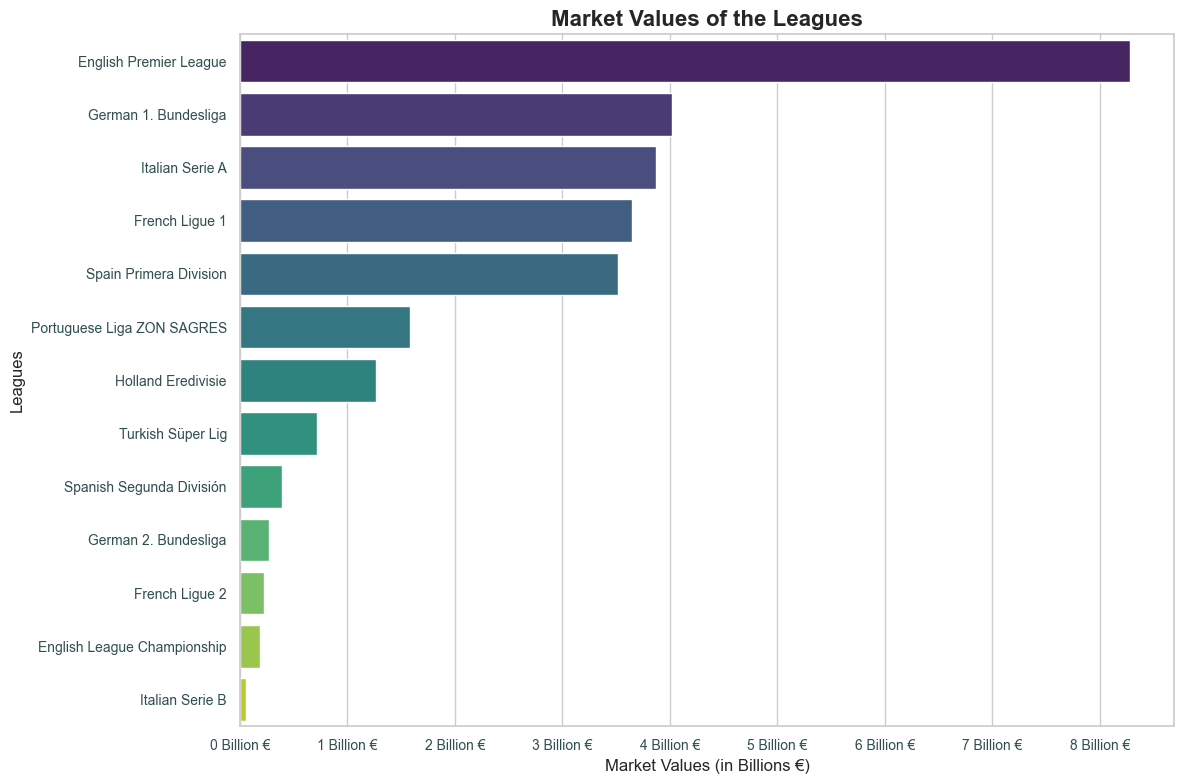

In [92]:
# Làm sạch dữ liệu: Loại bỏ các ký tự không hợp lệ và chuyển đổi sang kiểu số thực
df['value_eur'] = df['value_eur'].replace(r'[\$,]', '', regex=True).astype(float)

# Tính toán tổng giá trị thị trường theo League
summ = df.groupby('league_name').agg({'value_eur': 'sum'}).reset_index()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Vẽ biểu đồ cột với các màu sắc khác nhau cho từng giải đấu
bar_plot = sns.barplot(
    x='value_eur', 
    y='league_name', 
    hue='league_name', 
    data=summ.sort_values('value_eur', ascending=False), 
    palette='viridis', 
    dodge=False, 
    legend=False
)

# Thiết lập các thông số cho biểu đồ
bar_plot.set_xlabel('Market Values (in Billions €)', fontsize=12)
bar_plot.set_ylabel('Leagues', fontsize=12)
bar_plot.set_title('Market Values of the Leagues', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} Billion €".format(x / 1e9)))

# Áp dụng kiểu theme
plt.xticks(color='darkslategray', fontsize=10)
plt.yticks(color='darkslategray', fontsize=10)
bar_plot.xaxis.grid(True)
bar_plot.yaxis.grid(False)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [93]:
# Làm sạch dữ liệu: Loại bỏ các ký tự không hợp lệ và chuyển đổi sang kiểu số thực
df['value_eur'] = df['value_eur'].replace(r'[\$,]', '', regex=True).astype(float)

# Lấy dữ liệu top 3 đội bóng có giá trị cao nhất của mỗi giải đấu
grouped_leagues = df.groupby('league_name')
top_teams_list = [group.nlargest(3, 'value_eur') for name, group in grouped_leagues]
top_teams = pd.concat(top_teams_list).reset_index(drop=True)

# Lấy dữ liệu top 5 cầu thủ đắt giá nhất của từng câu lạc bộ
grouped_clubs = df.groupby('club_name')
top_players_list = [group.nlargest(5, 'value_eur') for name, group in grouped_clubs]
top_players = pd.concat(top_players_list).reset_index(drop=True)


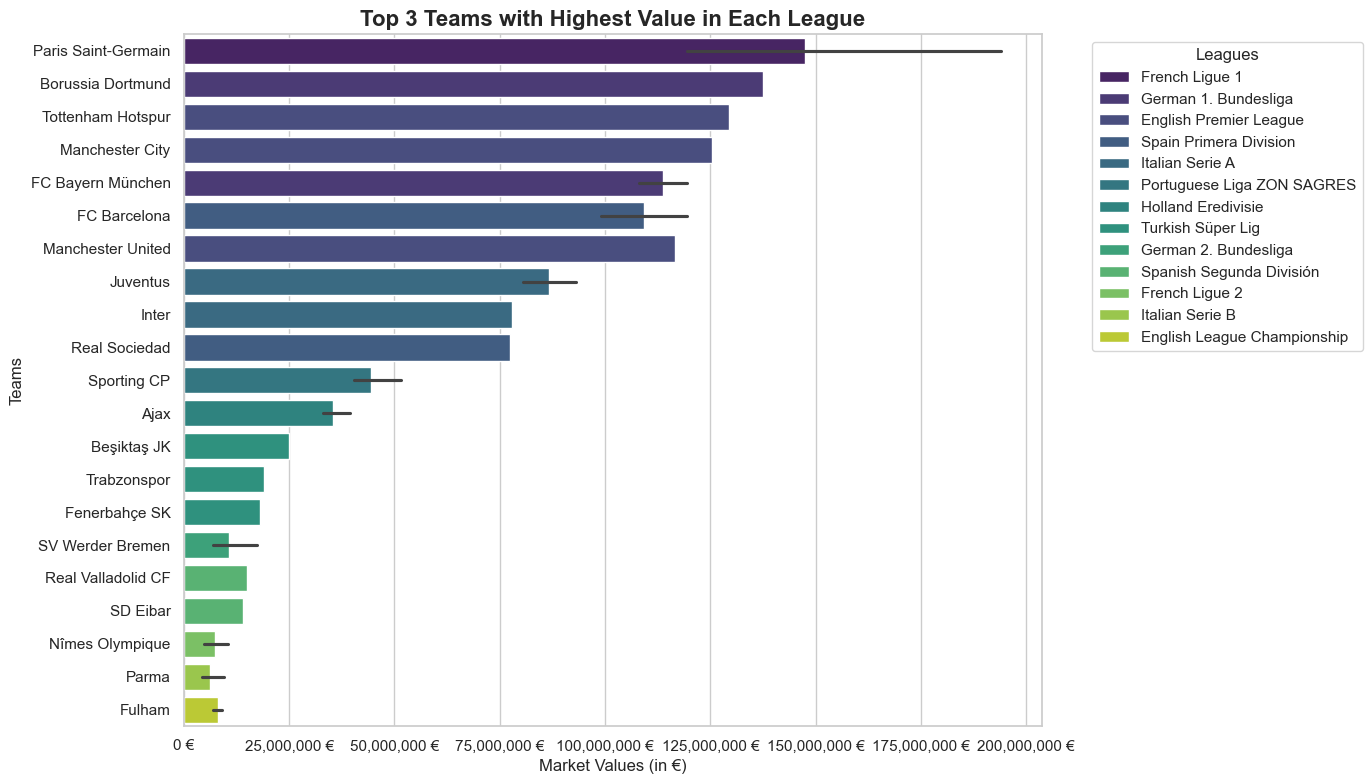

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Vẽ biểu đồ cho top 3 đội bóng có giá trị cao nhất của mỗi giải đấu
bar_plot = sns.barplot(
    x='value_eur', 
    y='club_name', 
    hue='league_name', 
    data=top_teams.sort_values('value_eur', ascending=False), 
    palette='viridis'
)

# Thiết lập các thông số cho biểu đồ
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Teams', fontsize=12)
bar_plot.set_title('Top 3 Teams with Highest Value in Each League', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Leagues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [95]:
# Lọc dữ liệu chỉ bao gồm các giải French Ligue 1, German 1. Bundesliga và English Premier League
filtered_df = df[df['league_name'].isin(['French Ligue 1', 'German 1. Bundesliga', 'English Premier League'])]

# Lấy dữ liệu top 3 đội bóng có giá trị cao nhất của mỗi giải đấu
grouped_leagues = filtered_df.groupby('league_name')
top_teams_list = [group.nlargest(3, 'value_eur') for name, group in grouped_leagues if len(group) >= 3]
top_teams = pd.concat(top_teams_list).reset_index(drop=True)

# Lấy dữ liệu top 5 cầu thủ đắt giá nhất của từng câu lạc bộ
grouped_clubs = filtered_df.groupby('club_name')
top_players_list = [group.nlargest(5, 'value_eur') for name, group in grouped_clubs if len(group) >= 5]
top_players = pd.concat(top_players_list).reset_index(drop=True)


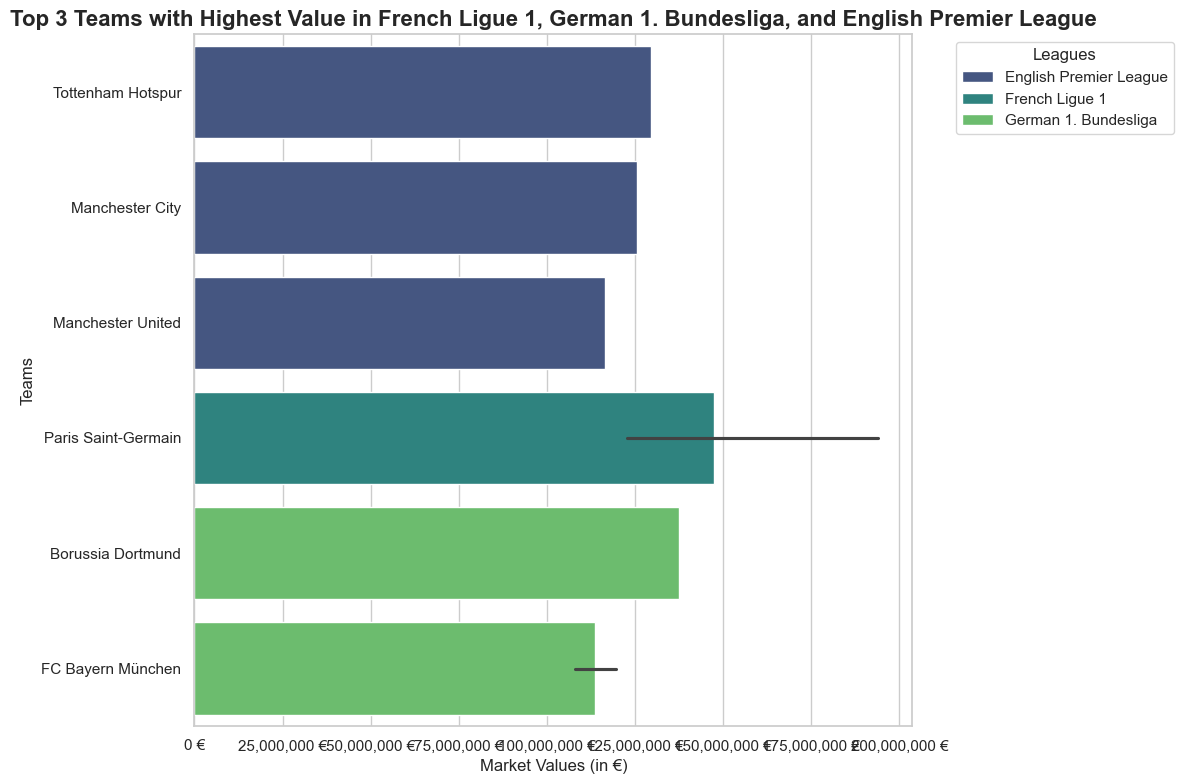

In [96]:
# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Sắp xếp dữ liệu để hiển thị gọn gàng
top_teams_sorted = top_teams.sort_values(by=['league_name', 'value_eur'], ascending=[True, False])

# Vẽ biểu đồ cho top 3 đội bóng có giá trị cao nhất của mỗi giải đấu
bar_plot = sns.barplot(
    x='value_eur', 
    y='club_name', 
    hue='league_name', 
    data=top_teams_sorted, 
    dodge=False, 
    palette='viridis'
)

# Thiết lập các thông số cho biểu đồ
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Teams', fontsize=12)
bar_plot.set_title('Top 3 Teams with Highest Value in French Ligue 1, German 1. Bundesliga, and English Premier League', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Leagues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


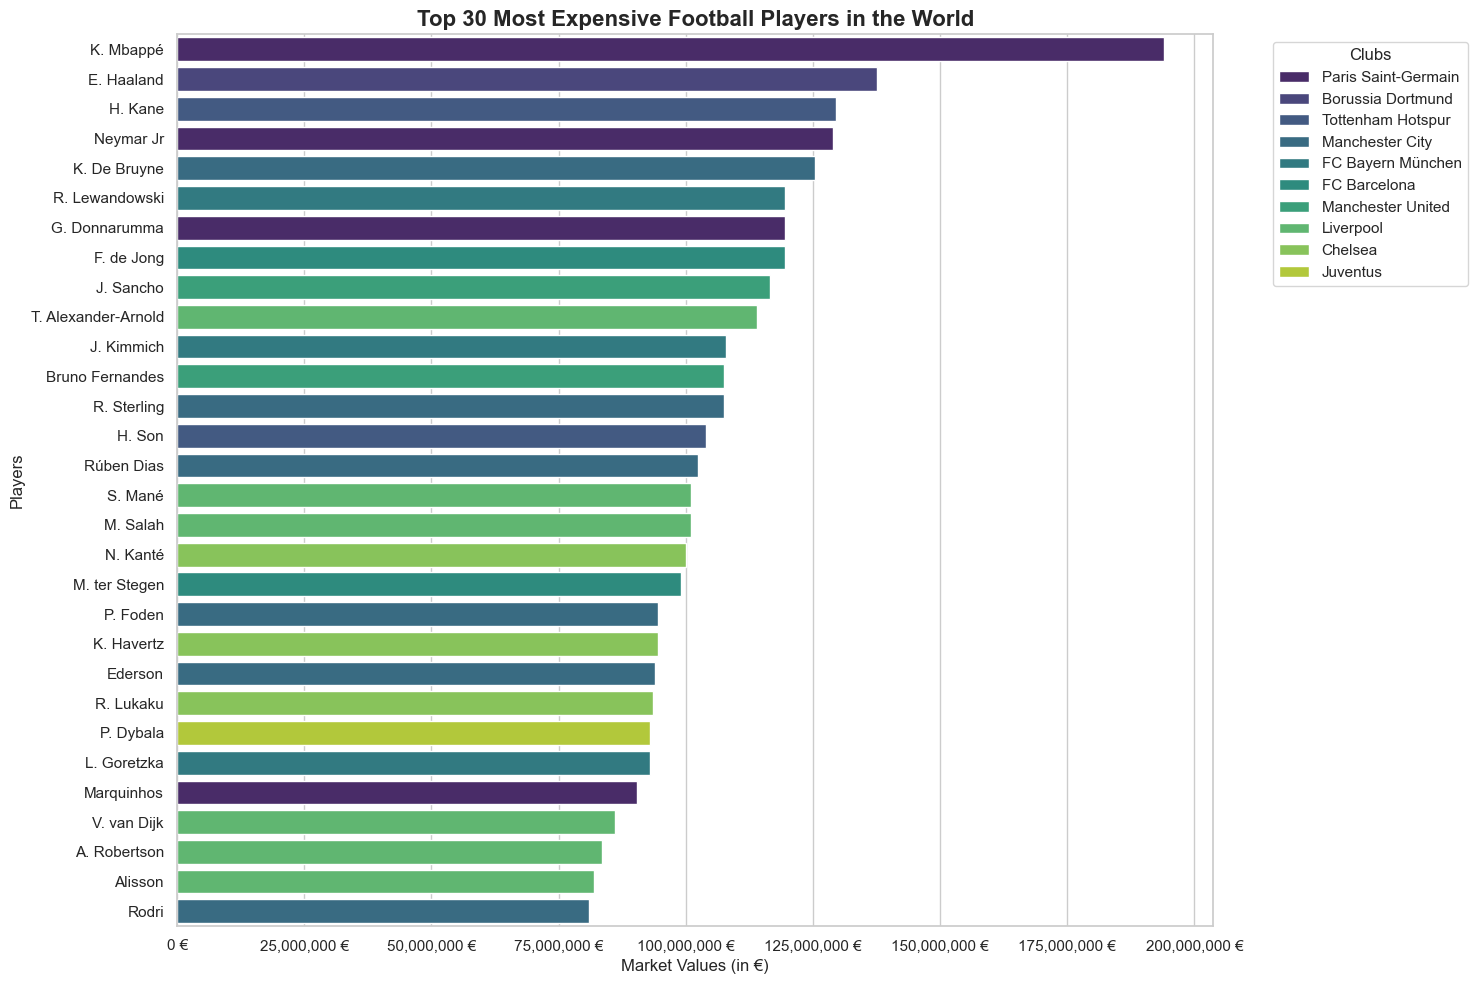

In [97]:
# Giả sử df là DataFrame chứa dữ liệu đã có
# Lọc top 30 cầu thủ đắt giá nhất
top_30_players = df.sort_values(by='value_eur', ascending=False).head(30)

# Chọn các cột cần thiết
top_30_players = top_30_players[['short_name', 'club_name', 'value_eur']]

# Thiết lập kích thước và phong cách của biểu đồ
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Vẽ biểu đồ cho top 30 cầu thủ đắt giá nhất thế giới
bar_plot = sns.barplot(
    x='value_eur', 
    y='short_name', 
    hue='club_name', 
    data=top_30_players, 
    dodge=False, 
    palette='viridis'
)

# Thiết lập các thông số cho biểu đồ
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Players', fontsize=12)
bar_plot.set_title('Top 30 Most Expensive Football Players in the World', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Clubs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


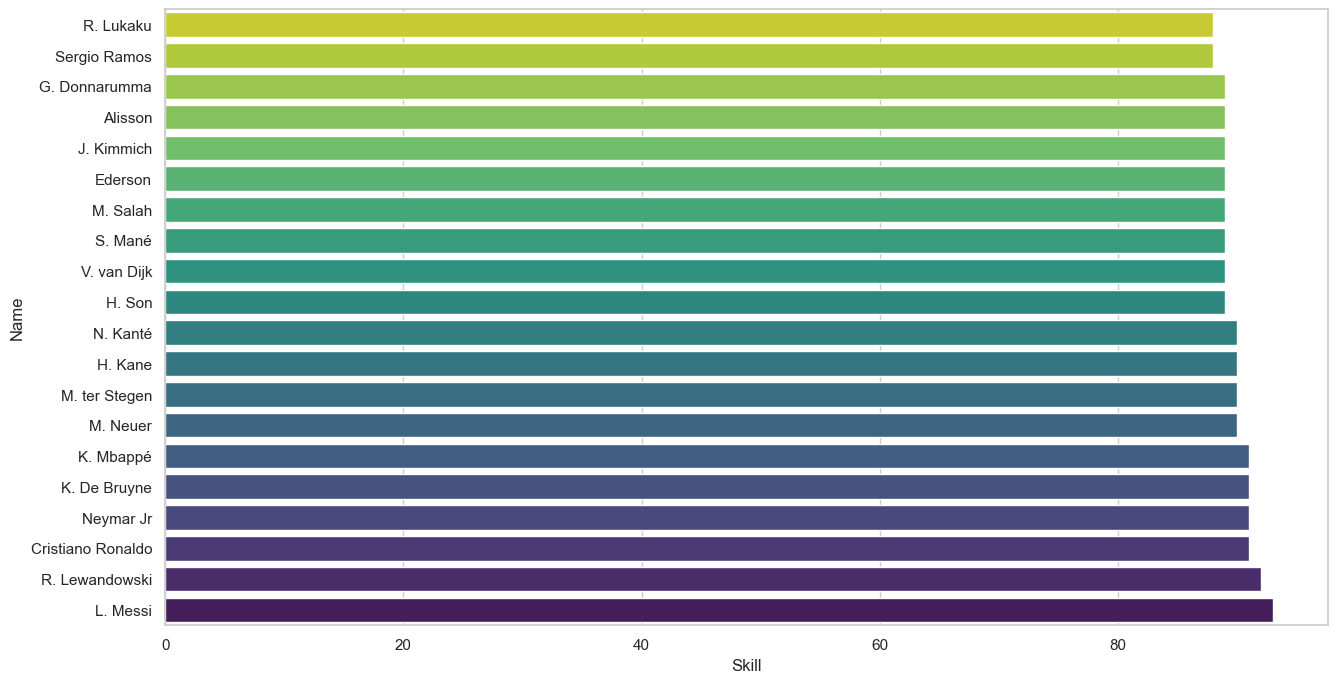

In [98]:
# Chuyển đổi các cột tương ứng
df['Skill'] = df['overall']  # Giả sử 'overall' tương đương với 'Skill'
df['Exp'] = df['potential']  # Giả sử 'potential' tương đương với 'Exp'
df['Name'] = df['short_name']  # Giả sử 'short_name' tương đương với 'Name'

# Lấy top 20 cầu thủ có Skill cao nhất
top_players = df.nlargest(20, 'Skill')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ và thiết lập hue với Name
g = sns.barplot(x='Skill', y='Name', hue='Name', data=top_players, palette='viridis', dodge=False, legend=False)
g.set_xlabel('Skill')
g.set_ylabel('Name')

# Lật trục Y để hiển thị từ trên xuống
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


In [99]:
# In danh sách tên cầu thủ trong dữ liệu để kiểm tra
print(df['long_name'].unique())

# Kiểm tra dữ liệu trong cột `long_name`
print(df[['long_name', 'club_name']].head(20))

# Lọc các cầu thủ
players = df[df['long_name'].isin(['Cristiano Ronaldo', 'Lionel Messi'])].copy()

# Kết hợp tên và câu lạc bộ
players['Name'] = players['long_name'] + ', ' + players['club_name']

# Chọn các kỹ năng của cầu thủ
skills_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
    'defending_standing_tackle', 'defending_sliding_tackle'
]
players = players[['Name'] + skills_columns]

# Sửa dấu chấm câu trong tên cột
players.columns = players.columns.str.replace(r'[^\w\s]', ' ', regex=True)

# Chuyển từ biến sang quan sát
players = players.melt(id_vars=['Name'], var_name='Skill', value_name='Exp')

# Hiển thị kết quả
print(players.head(10))


['Lionel Andrés Messi Cuccittini' 'Robert Lewandowski'
 'Cristiano Ronaldo dos Santos Aveiro' ... 'Manuel Nazaretian'
 'Pascal Juan Estrada' 'Oliver Webber']
                              long_name            club_name
0        Lionel Andrés Messi Cuccittini  Paris Saint-Germain
1                    Robert Lewandowski    FC Bayern München
2   Cristiano Ronaldo dos Santos Aveiro    Manchester United
3         Neymar da Silva Santos Júnior  Paris Saint-Germain
4                       Kevin De Bruyne      Manchester City
6                  Kylian Mbappé Lottin  Paris Saint-Germain
7                    Manuel Peter Neuer    FC Bayern München
8                 Marc-André ter Stegen         FC Barcelona
9                            Harry Kane    Tottenham Hotspur
10                         N'Golo Kanté              Chelsea
13                              손흥민 孙兴慜    Tottenham Hotspur
15                      Virgil van Dijk            Liverpool
16                           Sadio Mané          

In [100]:
import pandas as pd

# Lọc các cầu thủ Messi, Lewandowski, và Ronaldo
players = df[df['long_name'].isin([
    'Lionel Andrés Messi Cuccittini',
    'Robert Lewandowski',
    'Cristiano Ronaldo dos Santos Aveiro'])].copy()

# Kết hợp tên và câu lạc bộ
players['Name'] = players['long_name'] + ', ' + players['club_name']

# Chọn các kỹ năng của cầu thủ
skills_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
    'defending_standing_tackle', 'defending_sliding_tackle'
]
players = players[['Name'] + skills_columns]

# Sửa dấu chấm câu trong tên cột
players.columns = players.columns.str.replace(r'[^\w\s]', ' ', regex=True)

# Chuyển từ biến sang quan sát
players = players.melt(id_vars=['Name'], var_name='Skill', value_name='Exp')


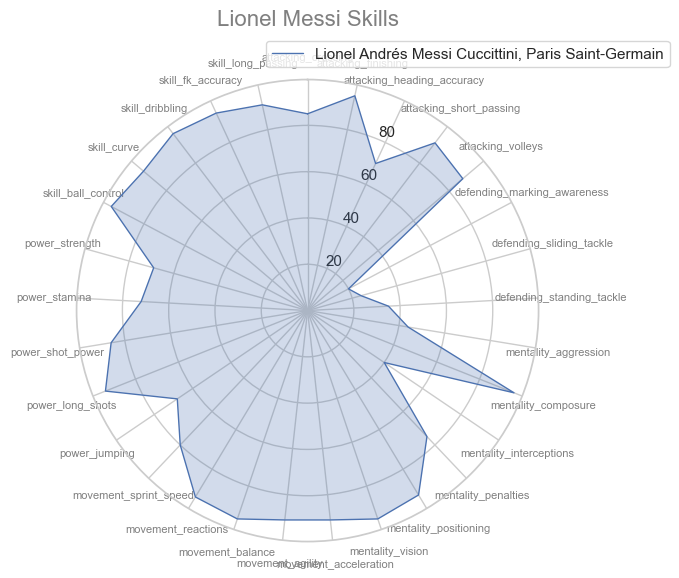

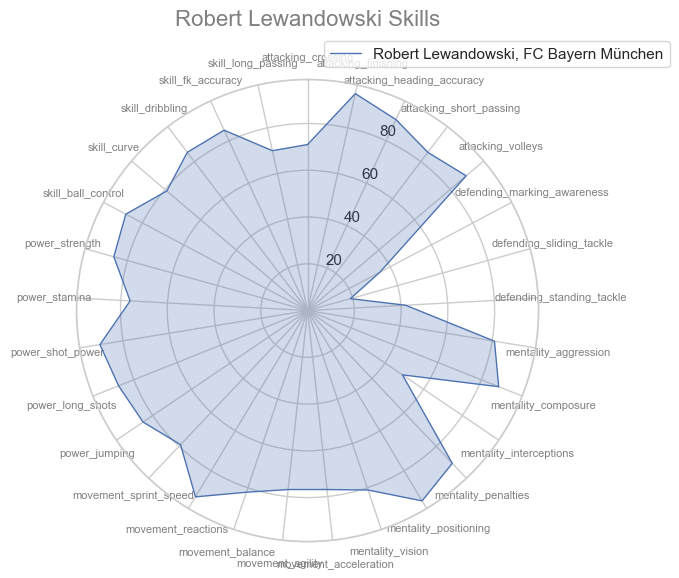

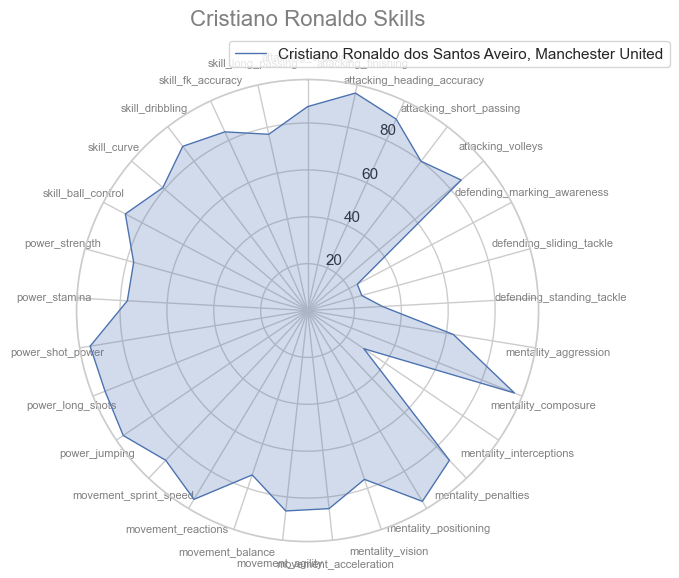

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Lọc dữ liệu cho từng cầu thủ
messi = players[players['Name'].str.contains('Messi')]
lewandowski = players[players['Name'].str.contains('Lewandowski')]
ronaldo = players[players['Name'].str.contains('Ronaldo')]

# Chuyển dữ liệu sang dạng trục
messi_skills = messi.pivot(index='Skill', columns='Name', values='Exp').reset_index()
lewandowski_skills = lewandowski.pivot(index='Skill', columns='Name', values='Exp').reset_index()
ronaldo_skills = ronaldo.pivot(index='Skill', columns='Name', values='Exp').reset_index()

# Tạo biểu đồ radar
def create_radar_chart(df, title, ax):
    categories = list(df['Skill'])
    labels = list(df.columns[1:])
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    for label in labels:
        values = df[label].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.25)

    plt.title(title, size=16, color='grey', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(messi_skills, 'Lionel Messi Skills', ax)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(lewandowski_skills, 'Robert Lewandowski Skills', ax)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(ronaldo_skills, 'Cristiano Ronaldo Skills', ax)
plt.show()


In [102]:
import pandas as pd

# Giả sử dữ liệu đã được đọc vào DataFrame df
# df = pd.read_csv("path_to_your_csv_file.csv", encoding="UTF-8")

# Lọc các cầu thủ sử dụng tên đầy đủ
players = df[df['long_name'].isin(['Cristiano Ronaldo dos Santos Aveiro', 'Lionel Andrés Messi Cuccittini'])].copy()

# Kết hợp tên và câu lạc bộ
players['Name'] = players['long_name'] + ', ' + players['club_name']

# Chọn các kỹ năng của cầu thủ
skills_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
    'defending_standing_tackle', 'defending_sliding_tackle'
]
players = players[['Name'] + skills_columns]

# Sửa dấu chấm câu trong tên cột
players.columns = players.columns.str.replace(r'[^\w\s]', ' ', regex=True)

# Chuyển từ biến sang quan sát
players = players.melt(id_vars=['Name'], var_name='Skill', value_name='Exp')

# Hiển thị kết quả
print(players.head(10))


                                                Name  \
0  Lionel Andrés Messi Cuccittini, Paris Saint-Ge...   
1  Cristiano Ronaldo dos Santos Aveiro, Mancheste...   
2  Lionel Andrés Messi Cuccittini, Paris Saint-Ge...   
3  Cristiano Ronaldo dos Santos Aveiro, Mancheste...   
4  Lionel Andrés Messi Cuccittini, Paris Saint-Ge...   
5  Cristiano Ronaldo dos Santos Aveiro, Mancheste...   
6  Lionel Andrés Messi Cuccittini, Paris Saint-Ge...   
7  Cristiano Ronaldo dos Santos Aveiro, Mancheste...   
8  Lionel Andrés Messi Cuccittini, Paris Saint-Ge...   
9  Cristiano Ronaldo dos Santos Aveiro, Mancheste...   

                        Skill  Exp  
0          attacking_crossing   85  
1          attacking_crossing   87  
2         attacking_finishing   95  
3         attacking_finishing   95  
4  attacking_heading_accuracy   70  
5  attacking_heading_accuracy   90  
6     attacking_short_passing   91  
7     attacking_short_passing   80  
8           attacking_volleys   88  
9           a

C:\Users\tbang\AppData\Local\Temp\ipykernel_6008\628809170.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Skill', y='Name', data=top_players, errorbar=None, palette='viridis', dodge=False)


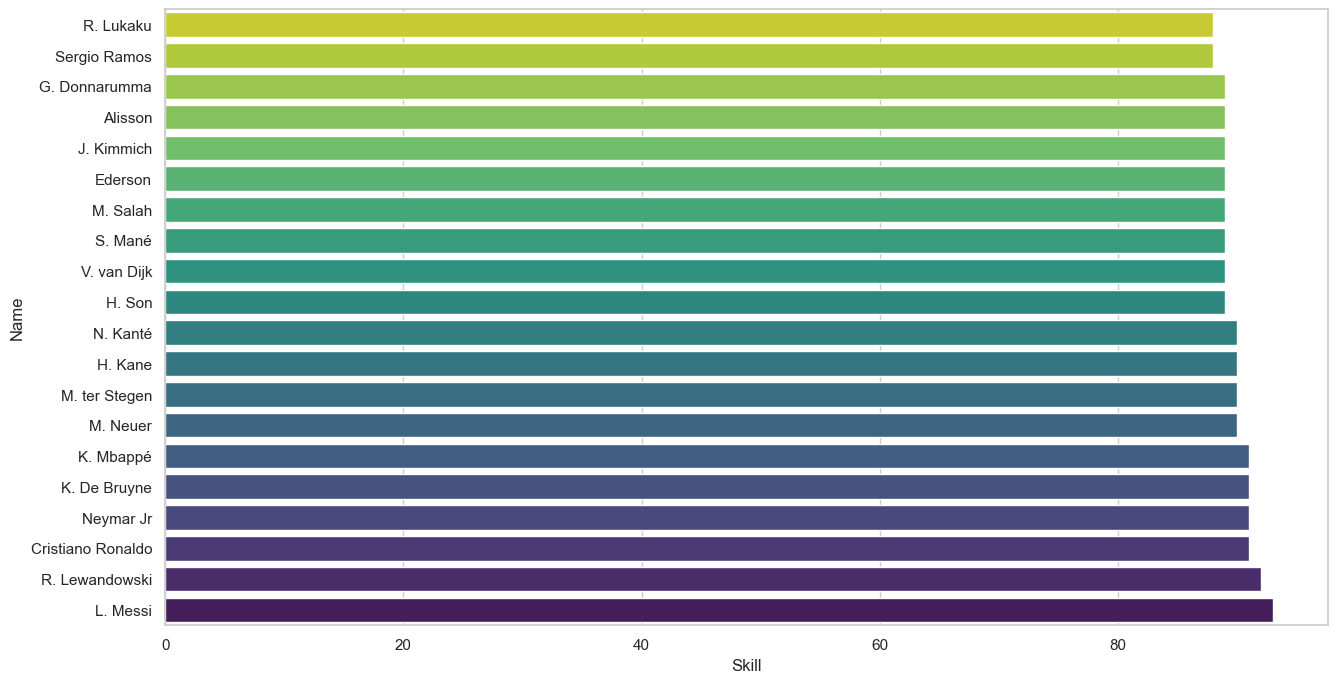

In [103]:
# Chuyển đổi các cột tương ứng
df['Skill'] = df['overall']  # Giả sử 'overall' tương đương với 'Skill'
df['Exp'] = df['potential']  # Giả sử 'potential' tương đương với 'Exp'
df['Name'] = df['short_name']  # Giả sử 'short_name' tương đương với 'Name'

# Lấy top 20 cầu thủ có Skill cao nhất
top_players = df.nlargest(20, 'Skill')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ và thiết lập hue với Name
g = sns.barplot(x='Skill', y='Name', data=top_players, errorbar=None, palette='viridis', dodge=False)
g.set_xlabel('Skill')
g.set_ylabel('Name')

# Lật trục Y để hiển thị từ trên xuống
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


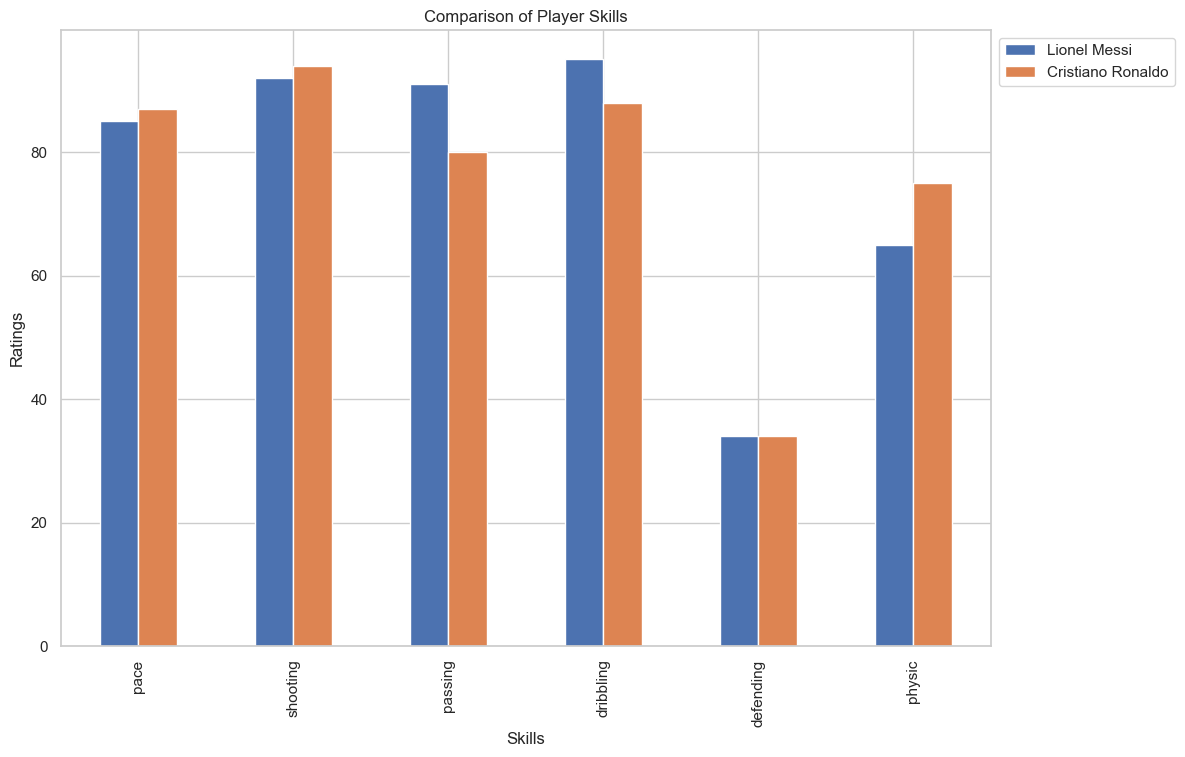

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lọc dữ liệu cho hai cầu thủ cụ thể
player1 = df[df['short_name'] == 'L. Messi']
player2 = df[df['short_name'] == 'Cristiano Ronaldo']

# Lựa chọn các kỹ năng để so sánh
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Kiểm tra nếu cả hai cầu thủ có đầy đủ dữ liệu kỹ năng
if player1.empty or player2.empty:
    print("Một trong hai cầu thủ không có trong dữ liệu.")
else:
    player1_stats = player1[skills].values.flatten()
    player2_stats = player2[skills].values.flatten()
    
    if len(player1_stats) == 0 or len(player2_stats) == 0:
        print("Một trong hai cầu thủ thiếu dữ liệu kỹ năng.")
    else:
        # Tạo DataFrame để so sánh
        comparison_df = pd.DataFrame({
            'Skill': skills,
            'Lionel Messi': player1_stats,
            'Cristiano Ronaldo': player2_stats
        })

        # Tạo biểu đồ thanh để so sánh từng kỹ năng
        comparison_df.plot(x='Skill', kind='bar', figsize=(12, 8))
        plt.title('Comparison of Player Skills')
        plt.xlabel('Skills')
        plt.ylabel('Ratings')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)

        # Hiển thị biểu đồ
        plt.show()


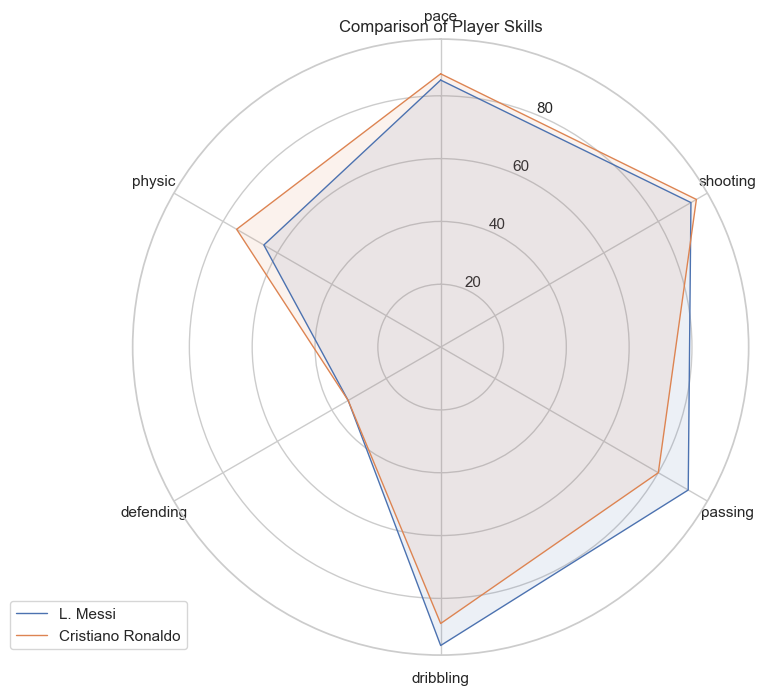

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Lọc dữ liệu cho hai cầu thủ cụ thể
player1 = df[df['short_name'] == 'L. Messi']
player2 = df[df['short_name'] == 'Cristiano Ronaldo']

# Lựa chọn các kỹ năng để so sánh
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
labels = np.array(skills)

# Lấy giá trị kỹ năng của từng cầu thủ
player1_stats = player1[skills].values.flatten().tolist()
player2_stats = player2[skills].values.flatten().tolist()

# Tạo dữ liệu cho biểu đồ radar
stats = [player1_stats, player2_stats]
player_names = ['L. Messi', 'Cristiano Ronaldo']

# Tạo biểu đồ radar
angles = [n / float(len(skills)) * 2 * pi for n in range(len(skills))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Đường chu vi đầu tiên
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Vẽ các trục cho mỗi kỹ năng
plt.xticks(angles[:-1], labels)

# Vẽ các đường tròn biểu diễn giá trị
ax.plot(angles, player1_stats + player1_stats[:1], linewidth=1, linestyle='solid', label=player_names[0])
ax.fill(angles, player1_stats + player1_stats[:1], alpha=0.1)

ax.plot(angles, player2_stats + player2_stats[:1], linewidth=1, linestyle='solid', label=player_names[1])
ax.fill(angles, player2_stats + player2_stats[:1], alpha=0.1)

# Thêm tiêu đề và chú thích
plt.title('Comparison of Player Skills')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Hiển thị biểu đồ
plt.show()


C:\Users\tbang\AppData\Local\Temp\ipykernel_6008\1727377841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=positions_df, y='player_positions', order=positions_df['player_positions'].value_counts().index, palette='viridis')


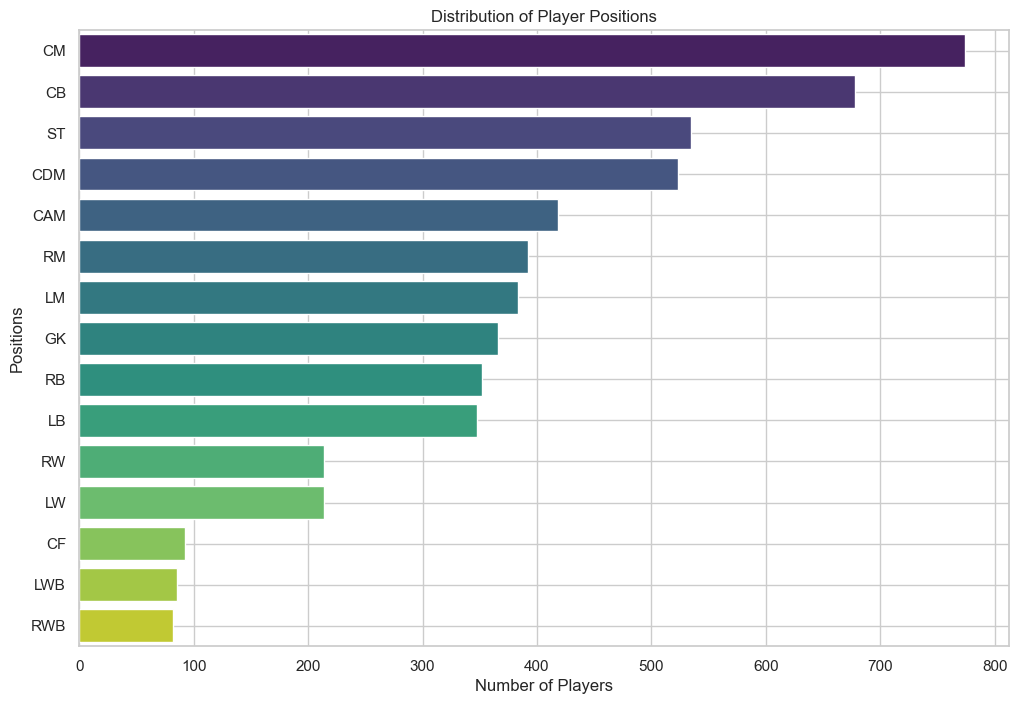

In [106]:
# Tách các vị trí của cầu thủ
df['player_positions'] = df['player_positions'].str.split(', ')

# Tạo DataFrame mới với các cầu thủ và các vị trí khác nhau
positions_df = df.explode('player_positions')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Tạo biểu đồ tần suất vị trí
sns.countplot(data=positions_df, y='player_positions', order=positions_df['player_positions'].value_counts().index, palette='viridis')
plt.title('Distribution of Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Positions')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


<Figure size 1500x1000 with 0 Axes>

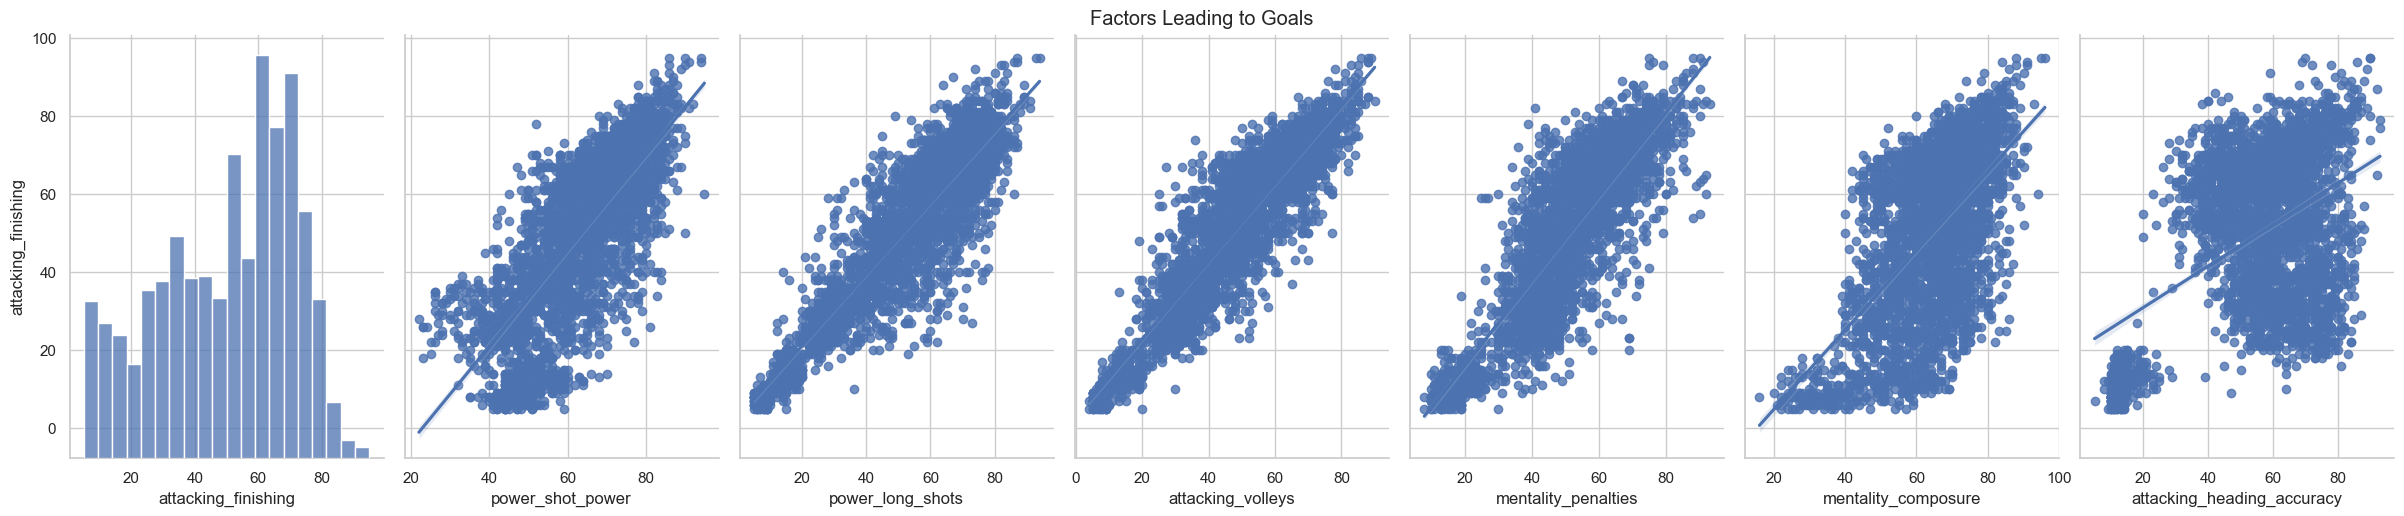

In [107]:
# Chọn các chỉ số liên quan đến ghi bàn
columns_of_interest = [
    'short_name', 'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
]

# Lọc dữ liệu
df_analysis = df[columns_of_interest]

# Kiểm tra xem có giá trị nào bị thiếu không
df_analysis = df_analysis.dropna()

# Tạo các biểu đồ trực quan
plt.figure(figsize=(15, 10))

# Tạo biểu đồ phân tán cho mỗi chỉ số so với khả năng ghi bàn
sns.pairplot(df_analysis, x_vars=[
    'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
], y_vars='attacking_finishing', height=5, aspect=0.7, kind='reg')

plt.suptitle('Factors Leading to Goals', y=1.02)
plt.show()


<Figure size 1500x1000 with 0 Axes>

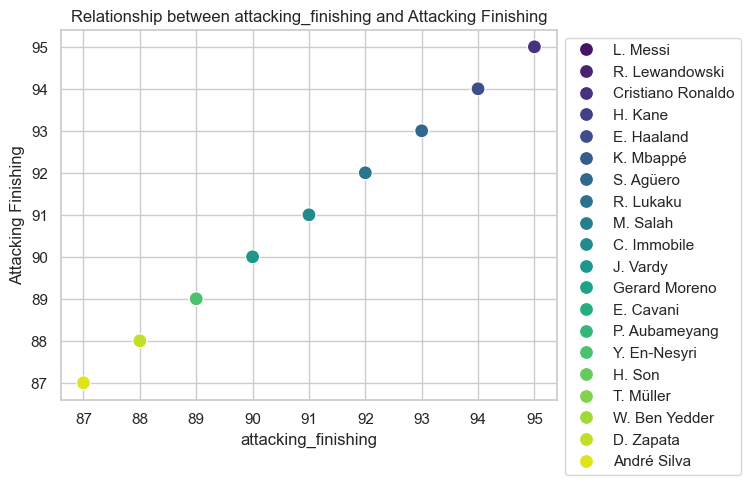

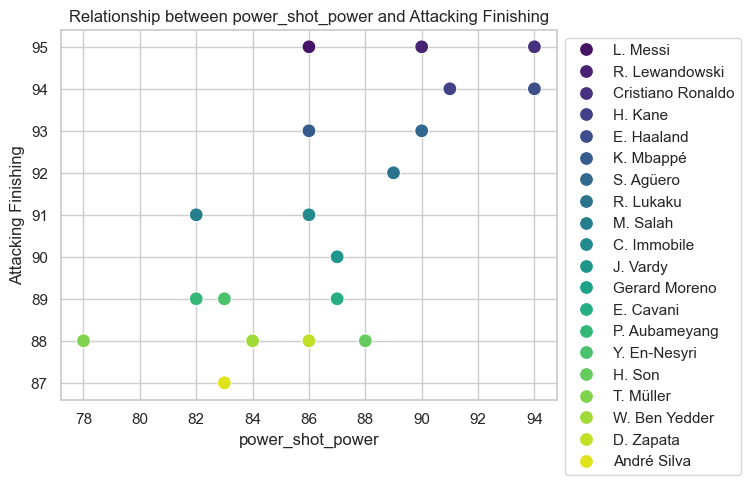

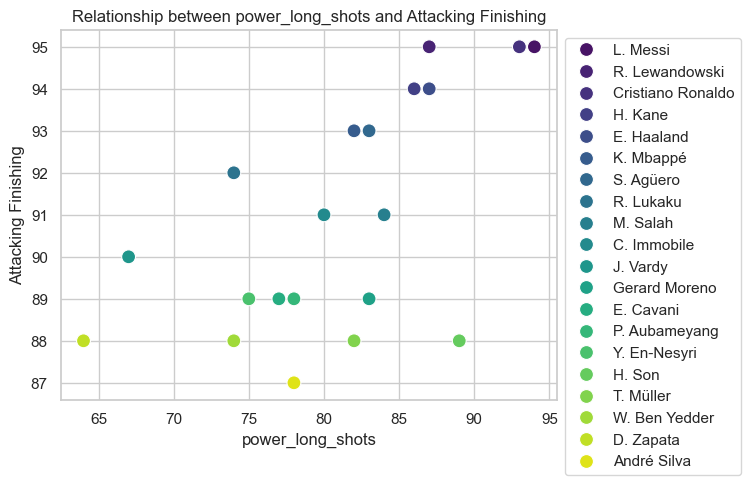

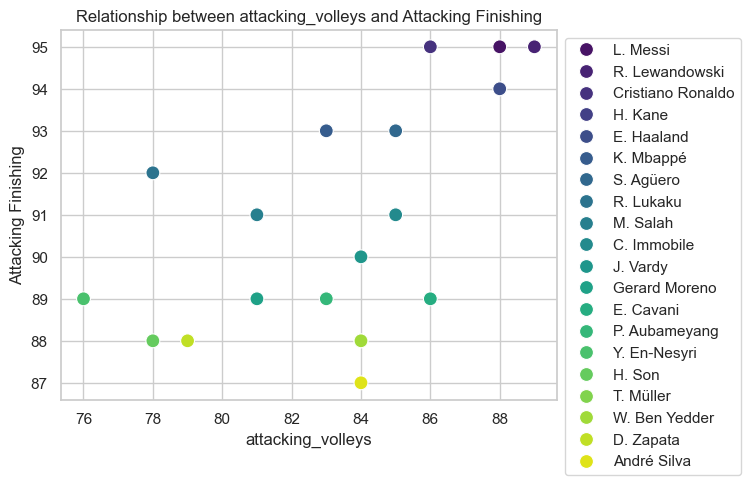

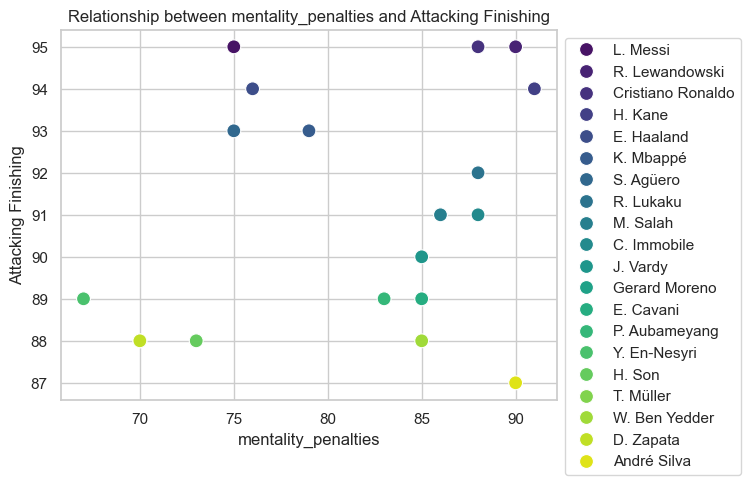

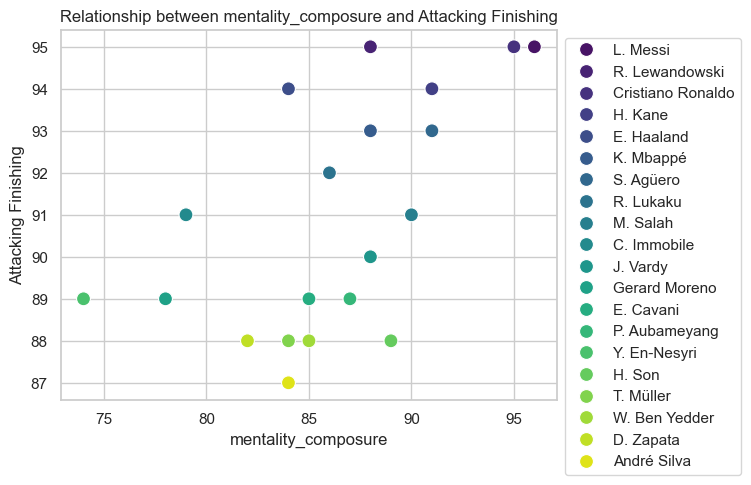

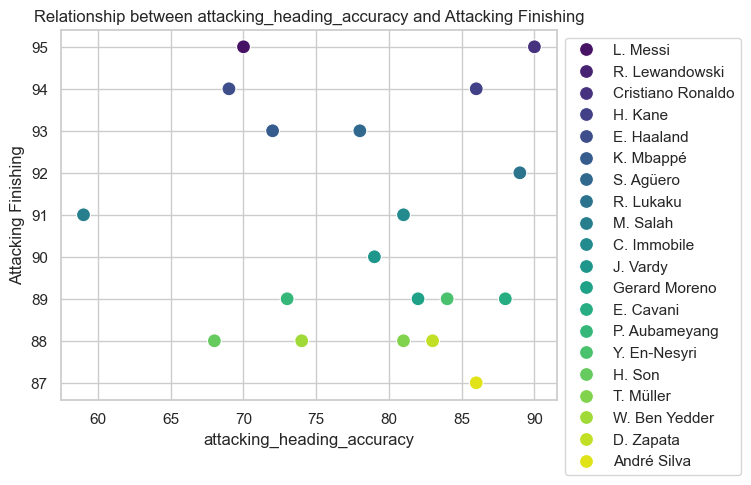

In [108]:
# Chọn các chỉ số liên quan đến ghi bàn
columns_of_interest = [
    'short_name', 'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
]

# Lọc dữ liệu
df_analysis = df[columns_of_interest]

# Chọn 20 cầu thủ có khả năng ghi bàn cao nhất
top_players = df_analysis.nlargest(20, 'attacking_finishing')

# Kiểm tra xem có giá trị nào bị thiếu không
top_players = top_players.dropna()

# Tạo các biểu đồ phân tán cho mỗi cầu thủ
plt.figure(figsize=(15, 10))

for skill in columns_of_interest[1:]:  # Bỏ qua 'short_name'
    plt.figure()
    sns.scatterplot(data=top_players, x=skill, y='attacking_finishing', hue='short_name', palette='viridis', s=100)
    plt.title(f'Relationship between {skill} and Attacking Finishing')
    plt.xlabel(skill)
    plt.ylabel('Attacking Finishing')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


C:\Users\tbang\AppData\Local\Temp\ipykernel_6008\834041332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='preferred_foot', y='power_shot_power', data=df, palette=['orangered', 'steelblue'])
C:\Users\tbang\AppData\Local\Temp\ipykernel_6008\834041332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='preferred_foot', y='attacking_finishing', data=df, palette=['orangered', 'steelblue'])


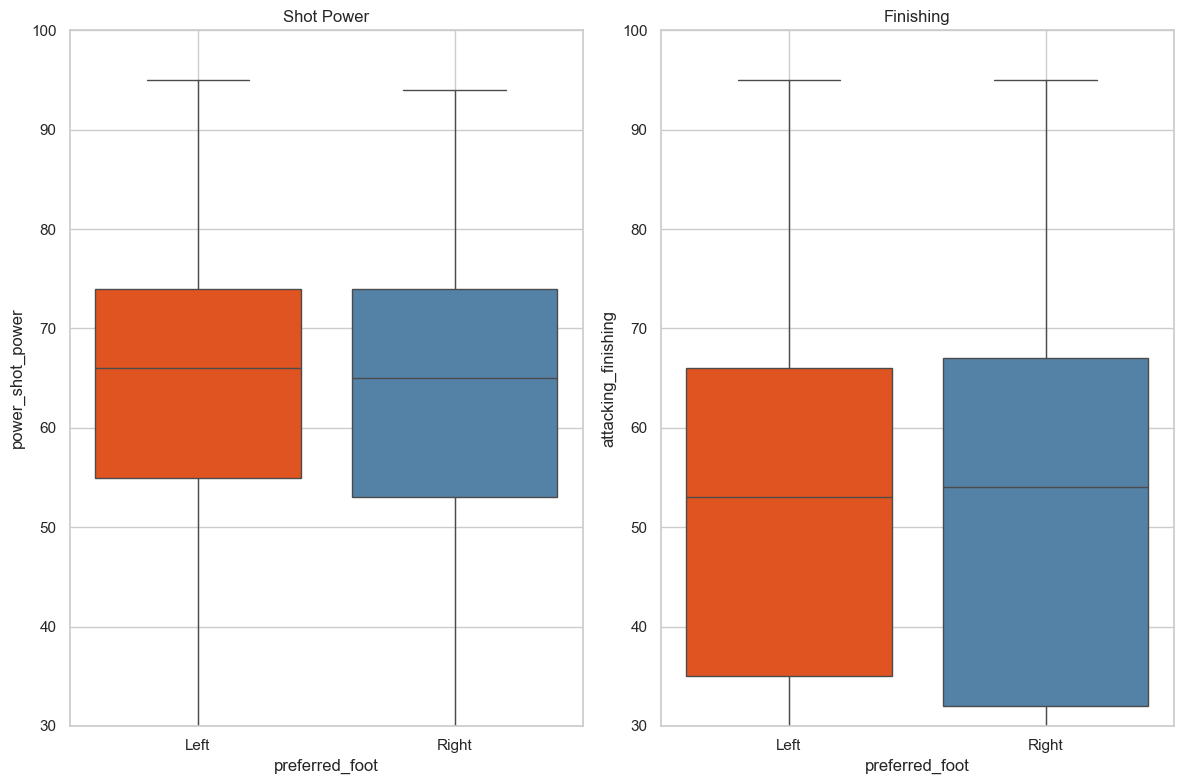

In [109]:
# Tạo hai biểu đồ hộp và sắp xếp chúng cạnh nhau
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))

# Biểu đồ hộp cho Shot Power
sns.boxplot(ax=axes[0], x='preferred_foot', y='power_shot_power', data=df, palette=['orangered', 'steelblue'])
axes[0].set_title('Shot Power')
axes[0].set_ylim(30, 100)
axes[0].grid(True)

# Biểu đồ hộp cho Finishing
sns.boxplot(ax=axes[1], x='preferred_foot', y='attacking_finishing', data=df, palette=['orangered', 'steelblue'])
axes[1].set_title('Finishing')
axes[1].set_ylim(30, 100)
axes[1].grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


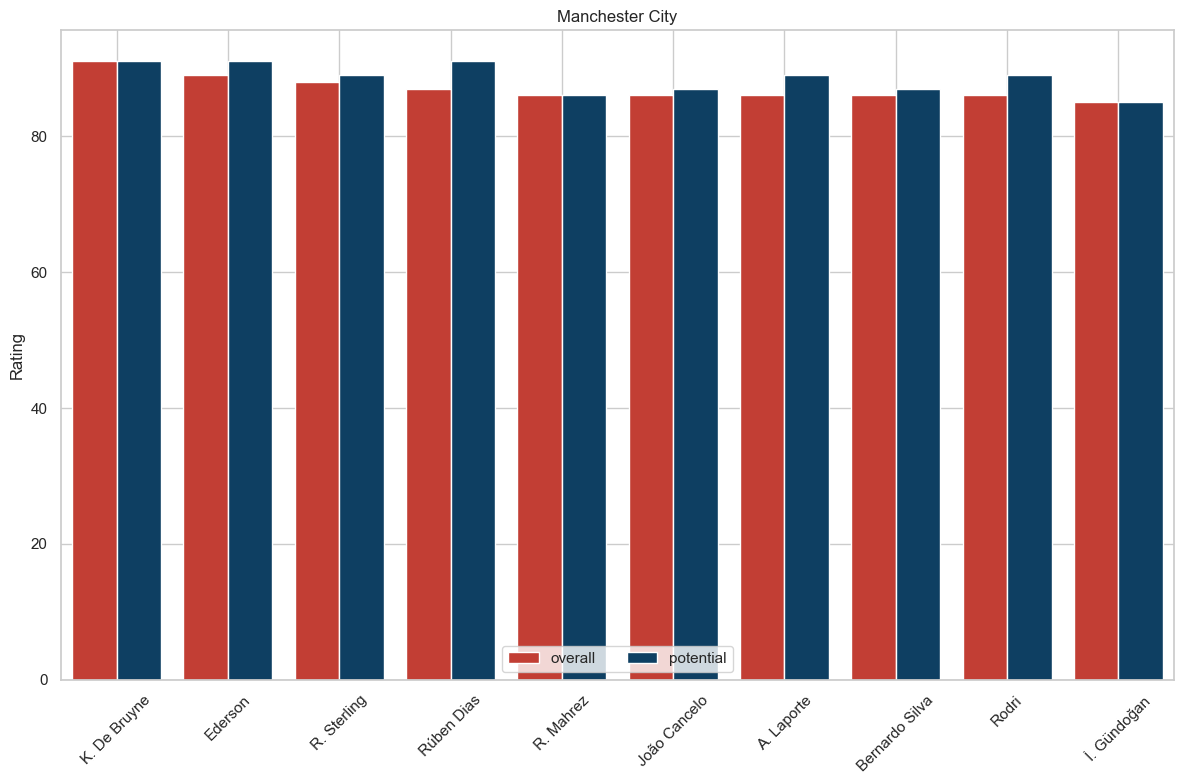

In [110]:
mancity_df = df[df['club_name'] == "Manchester City"]

# Chọn các cột Name, Overall, Potential và sắp xếp theo Overall giảm dần
mancity_top10 = mancity_df[['short_name', 'overall', 'potential']].sort_values(by='overall', ascending=False).head(10)

# Chuyển đổi dữ liệu từ rộng sang dài
mancity_long = pd.melt(mancity_top10, id_vars=['short_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(x='short_name', y='Exp', hue='variable', data=mancity_long, palette=["#DA291C", "#004170"])
plt.title('Manchester City')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


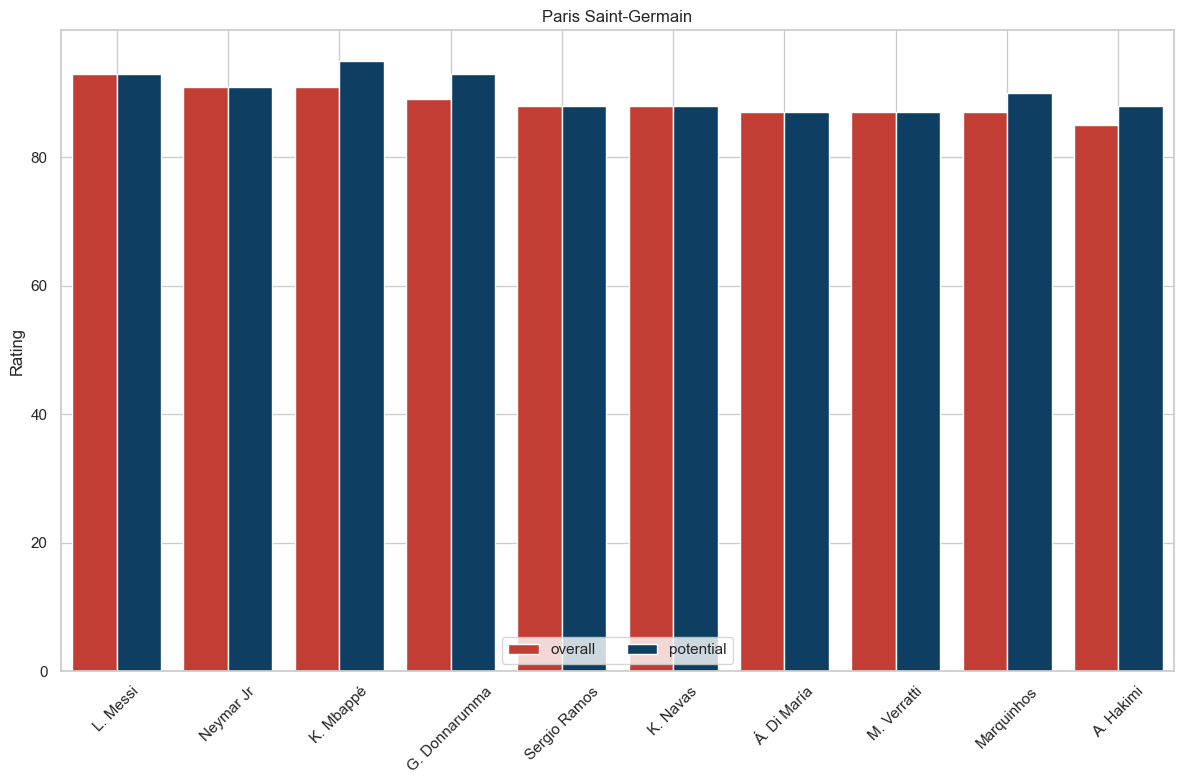

In [111]:
# Lọc dữ liệu cho câu lạc bộ Paris Saint-Germain
psg_df = df[df['club_name'] == "Paris Saint-Germain"]

# Chọn các cột Name, Overall, Potential và sắp xếp theo Overall giảm dần
psg_top10 = psg_df[['short_name', 'overall', 'potential']].sort_values(by='overall', ascending=False).head(10)

# Chuyển đổi dữ liệu từ rộng sang dài
psg_long = pd.melt(psg_top10, id_vars=['short_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(x='short_name', y='Exp', hue='variable', data=psg_long, palette=["#DA291C", "#004170"])
plt.title('Paris Saint-Germain')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


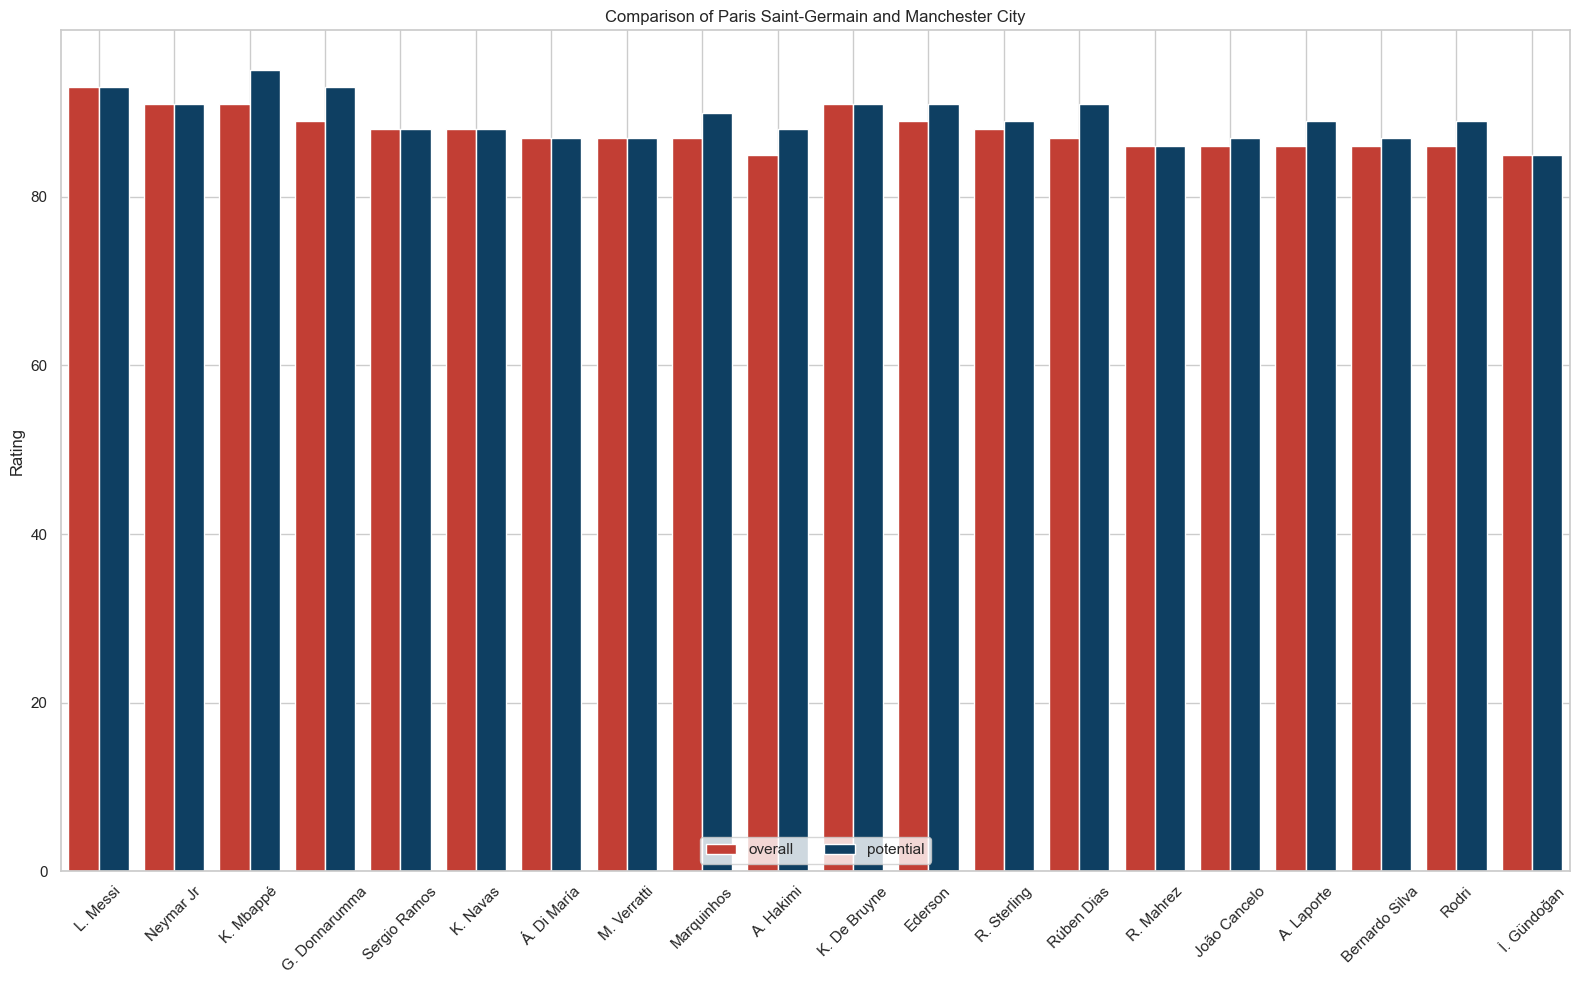

In [112]:
# Thêm cột 'club_name' để nhận diện câu lạc bộ
psg_top10['club_name'] = 'Paris Saint-Germain'
mancity_top10['club_name'] = 'Manchester City'

# Kết hợp dữ liệu của hai câu lạc bộ
combined_df = pd.concat([psg_top10, mancity_top10])

# Chuyển đổi dữ liệu từ rộng sang dài
combined_long = pd.melt(combined_df, id_vars=['short_name', 'club_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Tạo biểu đồ cột
plt.figure(figsize=(16, 10))
sns.barplot(x='short_name', y='Exp', hue='variable', data=combined_long, palette=["#DA291C", "#004170"])
plt.title('Comparison of Paris Saint-Germain and Manchester City')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


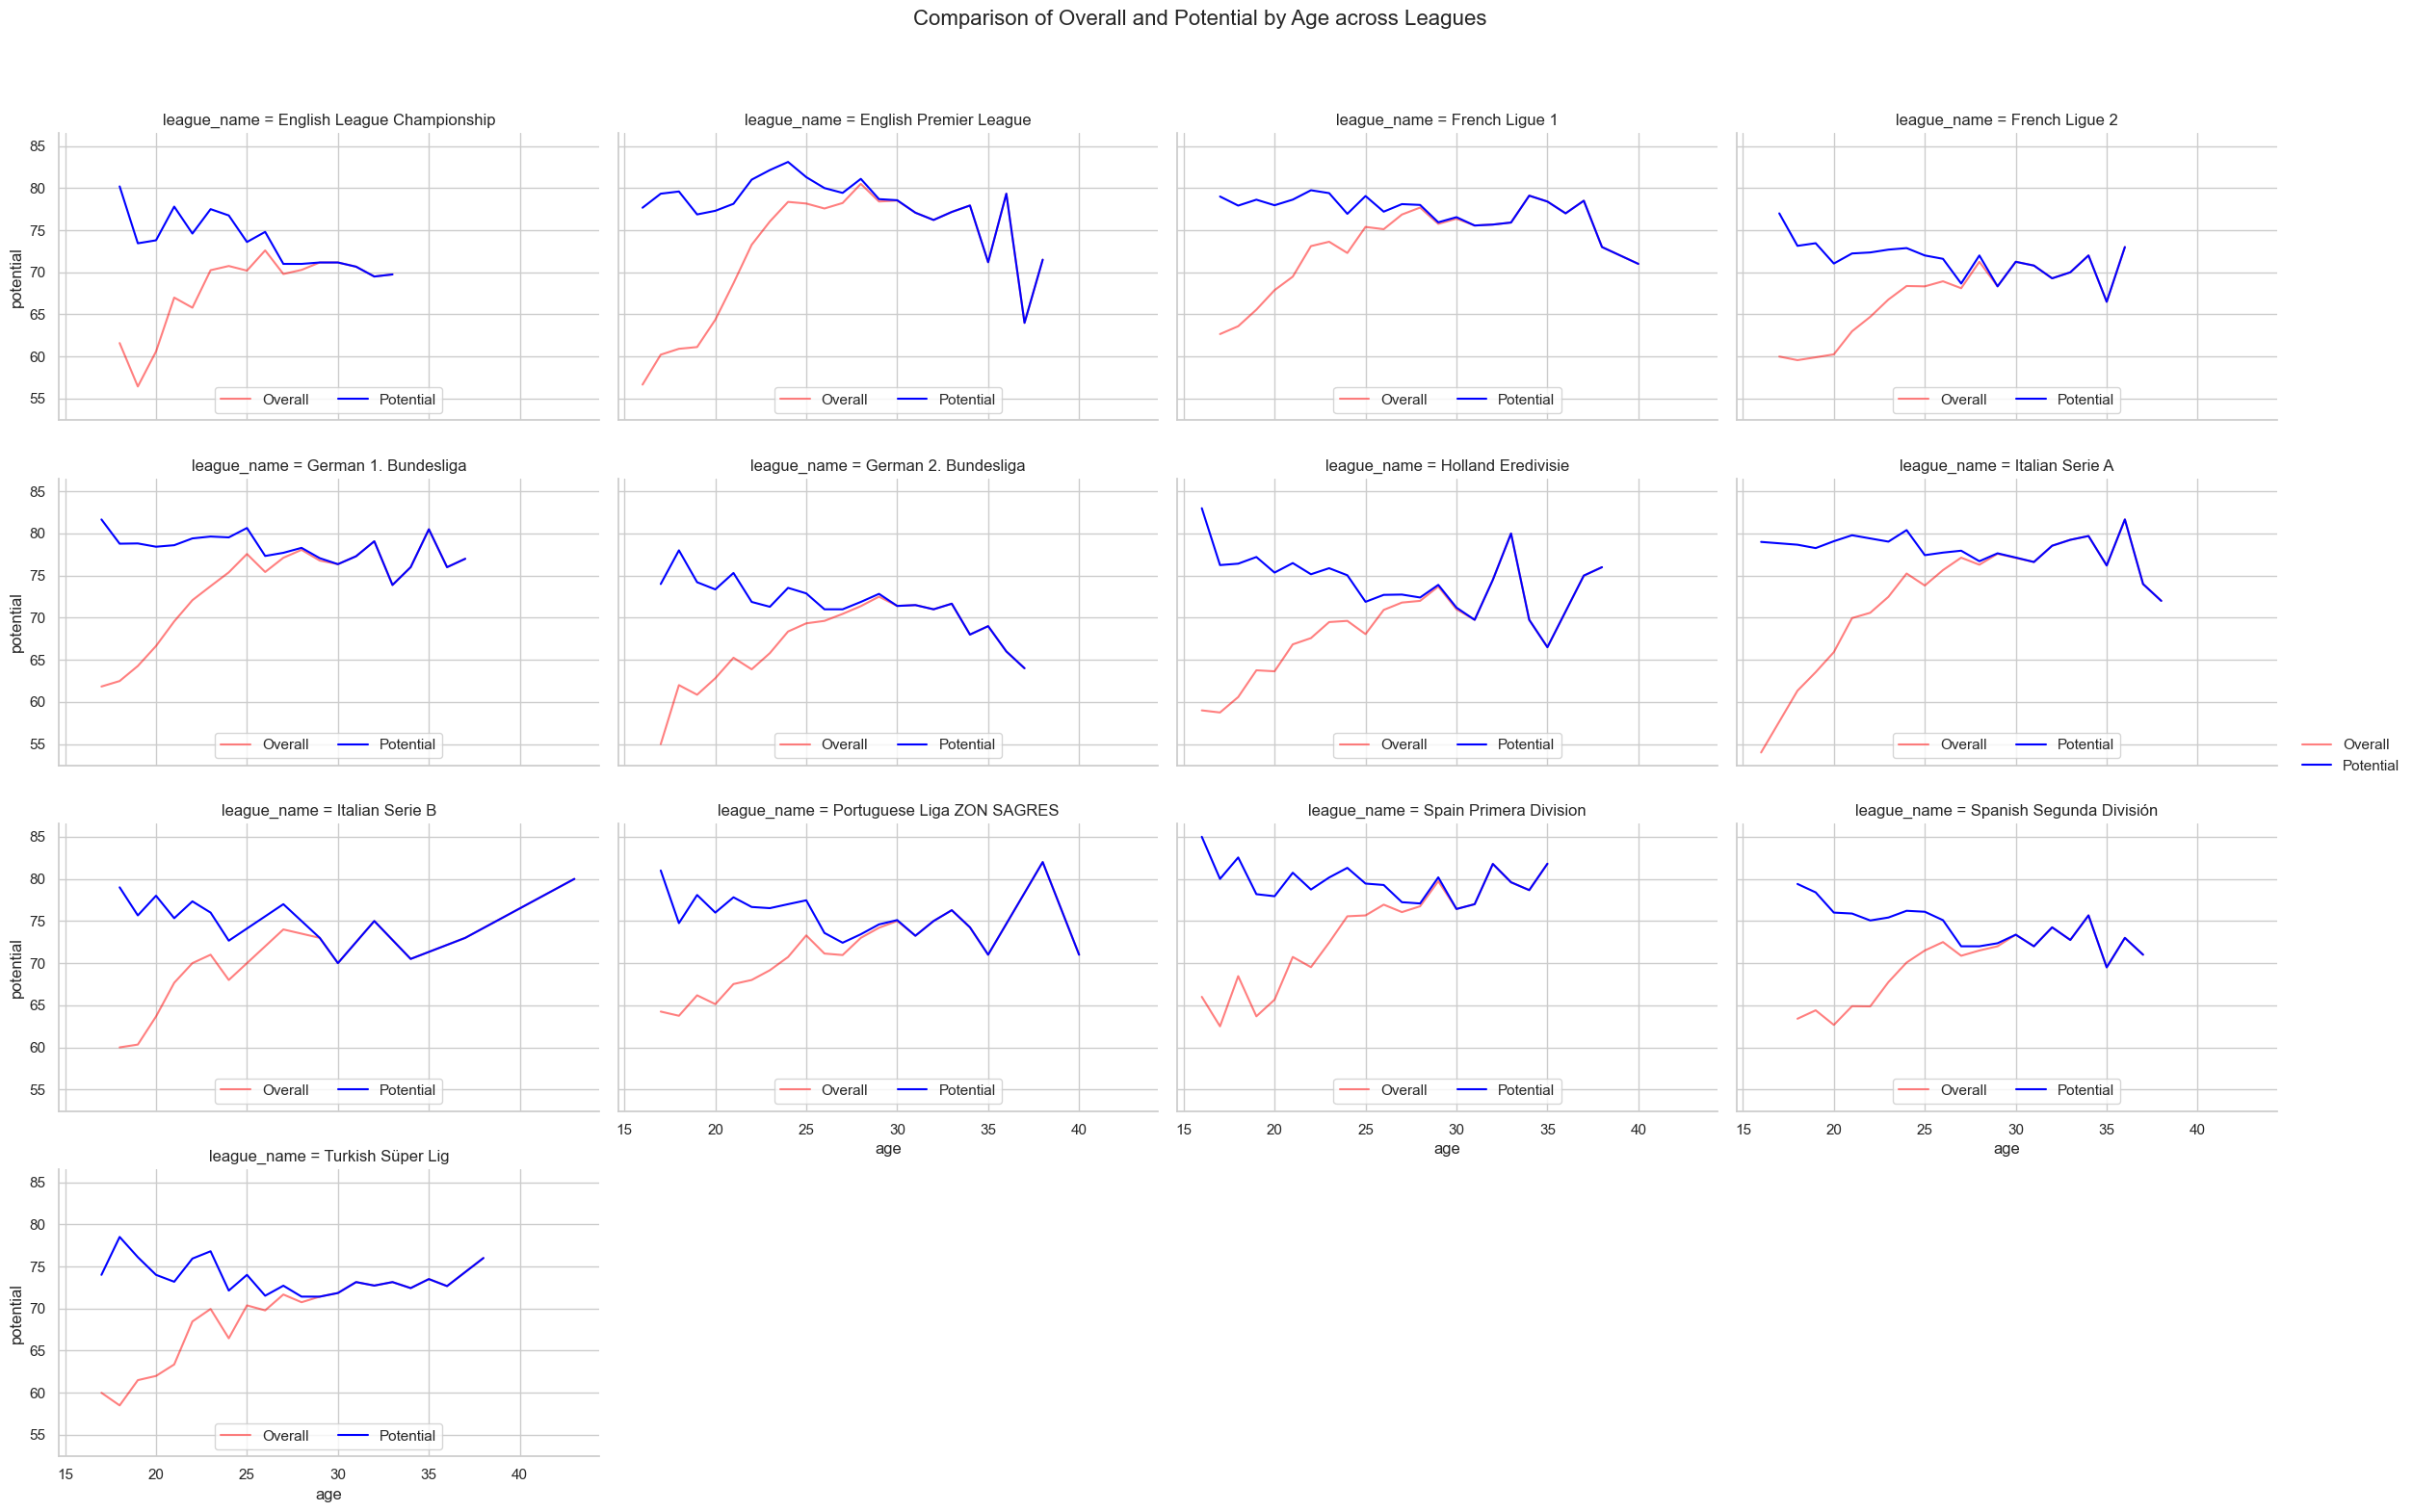

In [113]:
# Tính toán giá trị trung bình của Overall và Potential theo League và Age
df_grouped = df.groupby(['league_name', 'age']).agg({'overall': 'mean', 'potential': 'mean'}).reset_index()

# Tạo biểu đồ đường
g = sns.FacetGrid(df_grouped, col="league_name", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "age", "overall", label="Overall", color="red", alpha=0.5)
g.map(sns.lineplot, "age", "potential", label="Potential", color="blue")

# Tùy chỉnh biểu đồ
for ax in g.axes.flat:
    ax.legend(loc='lower center', ncol=2)

g.add_legend(title=None, label_order=["Overall", "Potential"])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of Overall and Potential by Age across Leagues', fontsize=16)

plt.show()
